**El problema**

En análisis exploratorio tiene el objetivo de entender el significado y la relevancia de cada variable con respecto al problema. Además apartir de este análisis se pueden determinar que acciones tomar para cada variable En este caso:

- La relevancia de la variable en la compra de una casa.
- La importancia de la variable.
- Solapamiento con otras variables.


Variable objetivo : 'SalePrice'.

- MSSubClass: clase de construcción
- MSZoning: clasificación de la zona
- LotFrontage: pies lineales de calle de la parcela
- LotArea: tamaño de la parcela en pies cuadrados
- Street: tipo de acceso por carretera
- Alley: tipo de acceso al callejón
- LotShape: forma de la parcela
- LandContour: planitud de la parcela
- Utilities: servicios públicos disponibles
- LotConfig: Configuración de parcela
- LandSlope: pendiente de la parcela
- Neighborhood: ubicación física dentro de los límites de la ciudad de Ames
- Condition1: proximidad a la carretera principal o al ferrocarril
- Condition2: proximidad a la carretera principal o al ferrocarril (si hay un segundo)
- BldgType: tipo de vivienda
- HouseStyle: estilo de vivienda
- OverallQual: calidad general del material y del acabado
- OverallCond: condición general
- YearBuilt: fecha original de construcción
- YearRemodAdd: fecha de remodelación
- RoofStyle: tipo de cubierta
- RoofMatl: material del techo
- Exterior1st: revestimiento exterior de la casa
- Exterior2nd: revestimiento exterior de la casa (si hay más de un material)
- MasVnrType: tipo de revestimiento de mampostería
- MasVnrArea: área de revestimiento de mampostería en pies cuadrados
- ExterQual: calidad del material exterior
- ExterCond: estado del material en el exterior
- Foundation: tipo de cimentación
- BsmtQual: altura del sótano
- BsmtCond: estado general del sótano
- BsmtExposure: paredes del sótano a nivel de calle o de jardín
- BsmtFinType1: calidad del área acabada del sótano
- BsmtFinSF1: pies cuadrados de la superficie acabada tipo 1
- BsmtFinType2: calidad de la segunda superficie acabada (si existe)
- BsmtFinSF2: Pies cuadrados de la superficie acabada tipo 2
- BsmtUnfSF: pies cuadrados del área sin terminar del sótano
- TotalBsmtSF: pies cuadrados totales del sótano
- Heating: tipo de calefacción
- HeatingQC: calidad y estado de la calefacción
- CentralAir: aire acondicionado central
- Electrical: sistema eléctrico
- 1erFlrSF: área en pies cuadrados de la primera planta (o planta baja)
- 2ndFlrSF: área en pies cuadrados de la segunda planta
- LowQualFinSF: pies cuadrados acabados de baja calidad (todos los pisos)
- GrLivArea: superficie habitable por encima del nivel del suelo en pies cuadrados
- BsmtFullBath: cuartos de baño completos en el sótano
- BsmtHalfBath: medio baño del sótano
- FullBath: baños completos sobre el nivel del suelo
- HalfBath: medios baños sobre el nivel del suelo
- Bedroom: número de dormitorios por encima del nivel del sótano
- Kitchen: número de cocinas
- KitchenQual: calidad de la cocina
- TotRmsAbvGrd: total de habitaciones por encima del nivel del suelo (no incluye baños)
- Functional: valoración de la funcionalidad de la vivienda
- Fireplaces: número de chimeneas
- FireplaceQu: calidad de la chimenea
- GarageType: ubicación del garaje
- GarageYrBlt: año de construcción del garaje
- GarageFinish: acabado interior del garaje
- GarageCars: tamaño del garaje en capacidad de coches
- GarageArea: tamaño del garaje en pies cuadrados
- GarageQual: calidad de garaje
- GarageCond: condición de garaje
- PavedDrive: calzada asfaltada
- WoodDeckSF: area de plataforma de madera en pies cuadrados
- OpenPorchSF: área de porche abierto en pies cuadrados
- EnclosedPorch: área de porche cerrada en pies cuadrados
- 3SsnPorch: área de porche de tres estaciones en pies cuadrados
- ScreenPorch: superficie acristalada del porche en pies cuadrados
- PoolArea: área de la piscina en pies cuadrados
- PoolQC: calidad de la piscina
- Fence: calidad de la valla
- MiscFeature: característica miscelánea no cubierta en otras categorías
- MiscVal: valor en dólares de la característica miscelánea
- MoSold: mes de venta
- YrSold: año de venta
- SaleType: tipo de venta
- SaleCondition: Condiciones de venta

In [1]:
pip install cufflinks

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 2.8 MB/s eta 0:00:04
   ------ --------------------------------- 1.6/9.8 MB 3.5 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.8 MB 3.9 MB/s eta 0:00:02
   ------------ --------------------------- 3.1/9.8 MB 3.8 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.8 MB 3.9 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.8 MB 4.0 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.8 MB 4.0 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/9.8 MB 4.0 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.8 MB 4.2 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.8 MB 4.2 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 4.1 MB/s eta 0

In [2]:
import pandas as pd
import cufflinks as cf
import warnings
warnings.filterwarnings("ignore")
from plotly.offline import plot,iplot
pd.options.plotting.backend = "plotly"
import plotly.graph_objects as go
import plotly.express as px#graficos express
import sys
from  functools import reduce
import numpy as np

cf.go_offline()
pd.set_option("display.max_columns",200)

In [3]:
def bar(df,col,title,x_title="",y_title=""):
    layout = go.Layout(font_family="Courier New, monospace",
    font_color="black",title_text=title,title_font_size=30,xaxis= {"title": {"text": x_title,"font": {"family": 'Courier New, monospace',"size": 18,
        "color": '#002e4d'}}},yaxis= {"title": {"text": y_title,"font": {"family": 'Courier New, monospace',"size": 18,
        "color": '#002e4d'}}},title_font_family="Courier New, monospace",title_font_color="#004878",template="plotly_white")
    aux=pd.DataFrame(df[col].value_counts()).reset_index().rename(columns={"index":"conteo"})
    fig=aux.iplot(kind='bar',x="conteo",y=col,title=title,asFigure=True,barmode="overlay",sortbars=True,color="#255479",layout=layout)
    fig.update_layout(width=800)
    fig.update_traces(marker_color='#005a96')
    return fig

def pie(df,col,title,x_title="",y_title=""):
    layout = go.Layout(template="plotly_white")
    colors=[ "#152337", "#183152","#17416d","#005096","#00569c","#005ba3","#0061a9","#1567af","#226cb6","#2c72bc", "#0061a9","#4c79b7","#7492c6","#98acd4","#bbc7e2","#dde3f1","#ffffff"
]
    aux=pd.DataFrame(df[col].value_counts()).reset_index().rename(columns={"index":"conteo"})
    fig=aux.iplot(kind='pie',labels="conteo",values=col,title=title,asFigure=True,theme="white")
    
    fig.update_traces(textfont_size=10,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.update_layout(font_family="Courier New, monospace",
    font_color="black",title_text=title,title_font_size=30,title_font_family="Courier New, monospace",title_font_color="#004878",template="plotly_white")
    return fig
def box(df,col,title):
    layout = go.Layout(font_family="Courier New, monospace",
    font_color="black",title_text=title,title_font_size=30,xaxis= {"title": {"font": {"family": 'Courier New, monospace',"size": 18,
        "color": '#002e4d'}}},title_font_family="Courier New, monospace",title_font_color="#004878",template="plotly_white")
    fig=df[[col]].iplot(kind='box',title=title,asFigure=True,theme="white",layout=layout,color="#005a96")
    return fig
def histogram(df,col,bins,title):
    layout = go.Layout(font_family="Courier New, monospace",
    font_color="black",title_text=title,title_font_size=30,xaxis= {"title": {"font": {"family": 'Courier New, monospace',"size": 18,
        "color": '#002e4d'}}},title_font_family="Courier New, monospace",title_font_color="#004878",template="plotly_white")
    fig=df[[col]].iplot(kind='histogram',x=col,bins=bins,title=title,asFigure=True,theme="white",layout=layout,color="#003e6c")
    fig.update_traces(opacity=0.90)
    return fig

In [4]:
def completitud(df):
    comple = pd.DataFrame(df.isnull().sum())
    comple.reset_index(inplace = True)
    comple = comple.rename(columns = {'index':'columna',0:'total'})
    comple['completitud'] = (1-comple['total']/df.shape[0]) * 100
    comple = comple.sort_values(by = "completitud", ascending = True)  
    return comple

In [5]:
def chi_square(df,col,valor_miss):
    x_i=df[col].fillna(valor_miss).value_counts()
    k=x_i.sum()
    p_i=df[col].dropna().value_counts(1)
    m_i=k*p_i
    chi=chisquare(f_obs=x_i,f_exp=m_i)
    p_val=chi.pvalue
    alpha=0.05
    if p_val<alpha:
        print("Rechazamos HO(La porporción de categorias es la misma que la general)")
    else:
        print("Aceptamos HO(La porporción de categorias es la misma que la general)")

In [8]:
df = pd.read_csv(r"C:\Users\Usuario\Downloads\dataset_house_prices.csv")

Clasificacion de variables

In [9]:
v_feats=["MSSubClass","MSZoning","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","Condition1","Condition2","BldgType","HouseStyle","OverallQual","OverallCond",
        "YearBuilt","YearRemodAdd","RoofStyle","RoofMatl","MasVnrType","ExterQual",
        "ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
        "Heating","HeatingQC","CentralAir","Electrical","LowQualFinSF","BsmtHalfBath","FullBath","KitchenAbvGr","KitchenQual","Functional","Fireplaces","FireplaceQu",
        "GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","PavedDrive","PoolQC","Fence",
        "MiscFeature","MoSold","YrSold","SaleType","SaleCondition"]
c_feats=["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
        "2ndFlrSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch",
        "PoolArea","MiscVal","BedroomAbvGr","HalfBath","GarageCars","BsmtFullBath","TotRmsAbvGrd"]
tgt=["SalePrice"]

v_feats_new = ["v_" + x for x in v_feats]
c_feats_new = ["c_" + x for x in c_feats]
t_feats_new = ["tgt_" + x for x in tgt]

df.rename(columns = dict(zip(v_feats, v_feats_new)), inplace = True)
df.rename(columns = dict(zip(c_feats, c_feats_new)), inplace = True)
df.rename(columns = dict(zip(tgt, t_feats_new)), inplace = True)

In [10]:
histogram(df,"tgt_SalePrice",20,"")

ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of histogram.marker
        Received value: 'rgba(0, 62, 108, np.float64(1.0))'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color: see https://plotly.com/python/css-colors/ for a list
      - A number that will be interpreted as a color
        according to histogram.marker.colorscale
      - A list or array of any of the above

In [11]:
miss=completitud(df)

In [12]:
miss

columna  total  completitud
72         v_PoolQC   1453     0.479452
74    v_MiscFeature   1406     3.698630
6           v_Alley   1369     6.232877
73          v_Fence   1179    19.246575
25     v_MasVnrType    872    40.273973
..              ...    ...          ...
76         v_MoSold      0   100.000000
77         v_YrSold      0   100.000000
78       v_SaleType      0   100.000000
79  v_SaleCondition      0   100.000000
80    tgt_SalePrice      0   100.000000

[81 rows x 3 columns]

In [13]:
null_cols=list(miss[miss["completitud"]<80]["columna"].values)

In [14]:
df=df.drop(columns=null_cols)

In [15]:
df["v_MSSubClass"]=df["v_MSSubClass"].astype(int)

In [16]:
for col in df.filter(like="c_"):
    df[col]=df[col].astype(float)

In [17]:
for col in df.filter(like="c_"):
    print(col)
    histogram(df,col,15,col).show()
    box(df,col,col).show()
    print("\n")

c_LotFrontage


ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of histogram.marker
        Received value: 'rgba(0, 62, 108, np.float64(1.0))'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color: see https://plotly.com/python/css-colors/ for a list
      - A number that will be interpreted as a color
        according to histogram.marker.colorscale
      - A list or array of any of the above

In [18]:
df_multi=df.copy()

## OUTLIERS

**c_LotFrontage**

### IQR

- Una regla de uso común dice que un punto de datos es un valor atípico si es más de 1.5 IQR por encima del tercer cuartil o por debajo del primer cuartil. Dicho de otra manera, los valores atípicos bajos están debajo Q1-1.5 IQR  y los valores atípicos altos están por encima Q3+1.5 IQR

In [19]:
df["c_LotFrontage"].hist()

In [20]:
col="c_LotFrontage"

In [21]:
q1 = df[col].quantile(.25)
q3 = df[col].quantile(.75)
iqr = q3 - q1
ub = q3 + 1.5 * iqr
lb = q1 - 1.5 * iqr

In [22]:
ub

np.float64(111.5)

In [23]:
lb

np.float64(27.5)

In [24]:
df.shape

(1460, 75)

In [25]:
88/1460

0.06027397260273973

In [26]:
n_iqr=df[(df[col] < lb) | (df[col] > ub)][col].shape[0]

In [27]:
n_iqr

88

In [28]:
lb_iqr=lb
ub_iqr=ub

In [29]:
df[(df[col] < lb) | (df[col] > ub)][col].describe()

count     88.000000
mean      83.897727
std       66.174454
min       21.000000
25%       21.000000
50%      114.000000
75%      129.000000
max      313.000000
Name: c_LotFrontage, dtype: float64

### Percentiles
-Usualmente se toma como banda inferior el percentil 5 y 95 como banda superior

In [30]:
lb = df[col].quantile(.05)
ub = df[col].quantile(.95)

In [31]:
df[col].describe(percentiles=[.05,.95])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
5%         34.000000
50%        69.000000
95%       107.000000
max       313.000000
Name: c_LotFrontage, dtype: float64

In [32]:
df[col].describe(percentiles=np.arange(0.1,1.1,.1))

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
10%        44.000000
20%        53.000000
30%        60.000000
40%        63.000000
50%        69.000000
60%        74.000000
70%        79.000000
80%        85.000000
90%        96.000000
100%      313.000000
max       313.000000
Name: c_LotFrontage, dtype: float64

In [33]:
lb

np.float64(34.0)

In [34]:
ub

np.float64(107.0)

In [35]:
df[(df[col] < lb) | (df[col] > ub)][col].describe()

count    112.000000
mean      80.973214
std       61.610000
min       21.000000
25%       24.000000
50%      108.000000
75%      121.250000
max      313.000000
Name: c_LotFrontage, dtype: float64

In [36]:
n_percentiles=df[(df[col] < lb) | (df[col] > ub)][col].shape[0]

In [37]:
n_percentiles

112

In [38]:
lb_per=lb
ub_per=ub

In [39]:
n_percentiles

112

In [40]:
n_iqr

88

### Z-SCORE

**Pruebas de normalidad estadística**
- Hay muchas pruebas estadísticas que podemos utilizar para cuantificar si una muestra de datos parece extraída de una distribución gaussiana.

- Cada prueba hace diferentes suposiciones y considera diferentes aspectos de los datos.


**Interpretación de una prueba**


- Estadístico : una cantidad calculada por la prueba que se puede interpretar en el contexto de la prueba comparándola con los valores críticos de la distribución de la estadística de prueba.
- valor p : se utiliza para interpretar la prueba, en este caso si la muestra se extrajo de una distribución gaussiana.

- Cada prueba calcula una estadística específica de la prueba. Esta estadística puede ayudar en la interpretación del resultado, aunque puede requerir un dominio más profundo de la estadística y un conocimiento más profundo de la prueba estadística específica. En cambio, el valor p se puede utilizar para interpretar la estadística de forma rápida y precisa en aplicaciones prácticas.

- Las pruebas suponen que la muestra se extrajo de una distribución gaussiana. Técnicamente, esto se llama hipótesis nula o H0. Se elige un nivel de umbral llamado alfa, típicamente 5% (o 0.05), que se usa para interpretar el valor p.

- En la implementación de SciPy de estas pruebas, puede interpretar el valor p de la siguiente manera.

- p <= alfa : rechazar H0, no es normal.
- p> alpha : falla al rechazar H0, normal.
- Esto significa que, en general, estamos buscando resultados con un valor p mayor para confirmar que nuestra muestra probablemente se extrajo de una distribución gaussiana.

- Un resultado superior al 5% no significa que la hipótesis nula sea cierta. Significa que es muy probable que sea cierto dada la evidencia disponible. El valor p no es la probabilidad de que los datos se ajusten a una distribución gaussiana; se puede considerar como un valor que nos ayuda a interpretar la prueba estadística.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html

**Prueba de Shapiro-Wilk**

Se cree que la prueba de Shapiro-Wilk es una prueba confiable de normalidad, aunque se sugiere que la prueba puede ser adecuada para muestras de datos más pequeñas, por ejemplo, miles de observaciones o menos.

In [41]:
list(df[col].dropna().values)

[np.float64(65.0),
 np.float64(80.0),
 np.float64(68.0),
 np.float64(60.0),
 np.float64(84.0),
 np.float64(85.0),
 np.float64(75.0),
 np.float64(51.0),
 np.float64(50.0),
 np.float64(70.0),
 np.float64(85.0),
 np.float64(91.0),
 np.float64(51.0),
 np.float64(72.0),
 np.float64(66.0),
 np.float64(70.0),
 np.float64(101.0),
 np.float64(57.0),
 np.float64(75.0),
 np.float64(44.0),
 np.float64(110.0),
 np.float64(60.0),
 np.float64(98.0),
 np.float64(47.0),
 np.float64(60.0),
 np.float64(50.0),
 np.float64(85.0),
 np.float64(70.0),
 np.float64(60.0),
 np.float64(108.0),
 np.float64(112.0),
 np.float64(74.0),
 np.float64(68.0),
 np.float64(65.0),
 np.float64(84.0),
 np.float64(115.0),
 np.float64(70.0),
 np.float64(61.0),
 np.float64(48.0),
 np.float64(84.0),
 np.float64(33.0),
 np.float64(66.0),
 np.float64(52.0),
 np.float64(110.0),
 np.float64(68.0),
 np.float64(60.0),
 np.float64(100.0),
 np.float64(24.0),
 np.float64(89.0),
 np.float64(66.0),
 np.float64(60.0),
 np.float64(63.0),
 np.f

In [42]:
from  scipy.stats  import  shapiro 
stat , p =shapiro(list(df[col].dropna().values) ) 

In [43]:
stat

np.float64(0.8804028736502089)

In [44]:
p

np.float64(2.0016921293556985e-29)

In [45]:
alpha = 0.05
if p > alpha:
    print( 'La muestra parece una Normal (No se rechaza H0)')
else:
    print('La muestra no parece una Normal (Se rechaza H0)')

La muestra no parece una Normal (Se rechaza H0)


In [46]:
histogram(df,col,15,col)

ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of histogram.marker
        Received value: 'rgba(0, 62, 108, np.float64(1.0))'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color: see https://plotly.com/python/css-colors/ for a list
      - A number that will be interpreted as a color
        according to histogram.marker.colorscale
      - A list or array of any of the above

**D'Agostino's K2Prueba**
- El D'Agostino'sK2La prueba calcula estadísticas de resumen a partir de los datos, a saber, la curtosis y la asimetría, para determinar si la distribución de datos se aparta de la distribución normal, llamada así por Ralph D'Agostino.

In [47]:
from  scipy.stats  import  normaltest
stat ,  p  =  normaltest( list(df[col].dropna().values) )

In [48]:
alpha = 0.05
if p > alpha:
    print('La muestra parece una Normal (No se rechaza H0)')
else:
    print('La muestra no parece una Normal (Se rechaza H0)')

La muestra no parece una Normal (Se rechaza H0)


In [49]:
from scipy.stats import zscore
#Calcule la puntuación z de cada valor de la muestra, en relación con la media y la desviación estándar de la muestra.

In [50]:
np.abs(zscore(df[col].dropna().values,nan_policy='omit'))

array([0.20803433, 0.40989452, 0.08444856, ..., 0.16683907, 0.08444856,
       0.20391824])

In [51]:
#Calcular el z-score
z=np.abs(zscore(df[col].dropna().values,nan_policy='omit'))
#Definimos el número de desviaciones
threshold=3
#Indices a eliminar de la tabla
np.where(z>3)

(array([ 161,  189,  260,  672,  754,  773,  915,  930,  974, 1000, 1069,
        1102]),)

In [52]:
n_zscore=len(np.where(z>3)[0])

In [53]:
n_zscore

12

### MEAN CHANGE

In [54]:
perc_100 = [x / 100 for x in range(100)]

In [55]:
dist = df[col].describe(perc_100).iloc[4:]

In [56]:
dist

0%      21.0
1%      21.0
2%      24.0
3%      24.0
4%      32.0
       ...  
96%    110.0
97%    120.0
98%    124.0
99%    141.0
max    313.0
Name: c_LotFrontage, Length: 101, dtype: float64

In [57]:
change_dist = df[col].describe(perc_100).iloc[4:].diff()

In [58]:
change_dist.mean()

np.float64(2.92)

In [59]:
dist = df[col].describe(perc_100).iloc[4:]
change_dist = df[col].describe(perc_100).iloc[4:].diff()
mean_change = df[col].describe(
    perc_100).iloc[4:].diff().mean()

In [57]:
mean_change

2.92

In [58]:
dist

0%      21.0
1%      21.0
2%      24.0
3%      24.0
4%      32.0
       ...  
96%    110.0
97%    120.0
98%    124.0
99%    141.0
max    313.0
Name: c_LotFrontage, Length: 101, dtype: float64

In [59]:
change_dist

0%       NaN
1%       0.0
2%       3.0
3%       0.0
4%       8.0
       ...  
96%      3.0
97%     10.0
98%      4.0
99%     17.0
max    172.0
Name: c_LotFrontage, Length: 101, dtype: float64

In [60]:
if change_dist["max"] > mean_change:
    ub = dist["max"] - mean_change
    print("A")
    print(ub)
    if ub < dist["99%"]:
        ub = dist["99%"]
        print("B")
        print(ub)

A
310.08


In [61]:
#Obtenemos todos los percentiles además del máximo
dist = df[col].describe(perc_100).iloc[4:]
#Obtenemos el cambio entre percentiles
change_dist = df[col].describe(perc_100).iloc[4:].diff()
#Obtenemos el cambio promedio entre percentiles
mean_change = df[col].describe(
    perc_100).iloc[4:].diff().mean()
#Si el cambio entre el percentil 99 y el maximo es mayor a el cambio promedio entonces:
if change_dist["max"] > mean_change:
    #La banda superior será el máximo menos el cambio promedio
    ub = dist["max"] - mean_change
    #si la banda superior es más pequeña que el percentil 99 , modificamos la banda para que tome el percentil 99
    if ub < dist["99%"]:
        ub = dist["99%"]
else:
#Si el cambio entre el percentil 99 y el maximo es menor o igual a el cambio promedio entonces se toma el percentil 99
    ub = dist["max"]

if change_dist["1%"] > mean_change:
    lb = dist["0%"] + mean_change
    if lb > dist["1%"]:
        lb = dist["1%"]
else:
    lb = dist["0%"]


In [62]:
ub

310.08

In [63]:
lb

21.0

In [64]:
n_mean_change=df[(df[col] < lb) | (df[col] > ub)][col].shape[0]

In [65]:
n_mean_change

2

In [66]:
lb_mc=lb
ub_mc=ub

In [67]:
print(f"Número de outliers por IQR:{n_iqr}")
print(f"Banda inferior IQR:{lb_iqr}")
print(f"Banda superior IQR:{ub_iqr}")
print(f"Número de outliers por Percentiles:{n_percentiles}")
print(f"Banda inferior Percentiles:{lb_per}")
print(f"Banda superior Percentiles:{ub_per}")
print(f"Número de outliers por MeanChange:{n_mean_change}")
print(f"Banda inferior MeanChange:{lb_mc}")
print(f"Banda superior MeanChange:{ub_mc}")

Número de outliers por IQR:88
Banda inferior IQR:27.5
Banda superior IQR:111.5
Número de outliers por Percentiles:112
Banda inferior Percentiles:34.0
Banda superior Percentiles:107.0
Número de outliers por MeanChange:2
Banda inferior MeanChange:21.0
Banda superior MeanChange:310.08


In [74]:
df.shape

(1460, 76)

In [75]:
col

'c_LotFrontage'

In [76]:
histogram(df,"c_LotFrontage",15,"c_LotFrontage")

In [78]:
histogram(df,"c_LotFrontage",15,"c_LotFrontage")

In [79]:
for col in df.filter(like="c_"):
    print(col)
    histogram(df,col,15,col).show()
    box(df,col,col).show()
    print("\n")

c_LotFrontage




c_LotArea




c_MasVnrArea




c_BsmtFinSF1




c_BsmtFinSF2




c_BsmtUnfSF




c_TotalBsmtSF




c_1stFlrSF




c_2ndFlrSF




c_GrLivArea




c_BsmtFullBath




c_HalfBath




c_BedroomAbvGr




c_TotRmsAbvGrd




c_GarageCars




c_GarageArea




c_WoodDeckSF




c_OpenPorchSF




c_EnclosedPorch




c_3SsnPorch




c_ScreenPorch




c_PoolArea




c_MiscVal


### MÉTODOS MULTIVARIADOS

- Isolation Forest
- Local outlier factor
- Feature Bagging
- Extreme Boosting Based Outlier Detection

https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e

https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html

https://core.ac.uk/display/23680901

https://arxiv.org/abs/1912.00290


**LOF**

- ¿Qué es el factor de valor atípico local (LOF)?
- LOF es un algoritmo de aprendizaje automático no supervisado que usa la densidad de puntos de datos en la distribución como un factor clave para detectar valores atípicos.
- LOF compara la densidad de cualquier punto de datos dado con la densidad de sus vecinos. Dado que los valores atípicos provienen de áreas de baja densidad, la proporción será mayor para los puntos de datos anómalos. Como regla general, un punto de datos normal tiene un LOF entre 1 y 1,5, mientras que las observaciones anómalas tendrán un LOF mucho más alto o negativo. Cuanto mayor sea el LOF, más probable será que sea un valor atípico. Si el LOF del punto X es 5, significa que la densidad promedio de los vecinos de X es 5 veces mayor que su densidad local.

- LOF(X)=[(LRD(1st neighbor) + LRD(2nd neighbor ) + .................+ LRD(kth neighbor))/LRD(X)]/k
- donde LRD es la distancia de accesibilidad local y se calcula de la siguiente manera.

LRD(X) = 1 / (suma de la distancia de accesibilidad (X, n)) / k), donde n son vecinos hasta k

LRD es la distancia estimada a la que un punto puede ser encontrado por sus vecinos.

https://www.google.com/search?q=local+outlier+factor&sxsrf=ALeKk02IzvEI4flUr62qa_nGuI6DfE-Ksg:1612468748449&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjlotmXgtHuAhVLQq0KHelxDAYQ_AUoAnoECAkQBA&biw=2133&bih=1026#imgrc=DUWOISbN4_VHXM

- Hiperparámetro k: determina el número de vecinos
- Distancia de accesibilidad: distancias medidas con 3 métodos: euclidean, Minkowski, Manhattan
- Distancia de accesibilidad local: (LRD) (X) = 1 / (suma de la distancia de accesibilidad (X, n)) / k), donde n son vecinos hasta k
- Factor de valor atípico local (LOF)

In [80]:
# outlier/anomaly detection
from sklearn.neighbors import LocalOutlierFactor

In [81]:
df_lof=df_multi.filter(like="c_").dropna()

In [82]:
#parametros del modelo
#contamination :La cantidad de contaminación del conjunto de datos, es decir, la proporción
#de valores atípicos en el conjunto de datos. Al ajustar esto se utiliza para definir el
#umbral en las puntuaciones de las muestras.
model = LocalOutlierFactor(n_neighbors= 4, metric = "euclidean", contamination = 0.02)

In [83]:
y_pred = model.fit_predict(df_lof)

In [84]:
outlier_index = np.where(y_pred <=-1) # los valores negativos son valores atípicos
outlier_values = df_lof.iloc[outlier_index]

In [85]:
outlier_values

c_LotFrontage  c_LotArea  c_MasVnrArea  c_BsmtFinSF1  c_BsmtFinSF2  \
5              85.0    14115.0           0.0         732.0           0.0   
78             72.0    10778.0           0.0           0.0           0.0   
297            66.0     7399.0        1600.0         649.0           0.0   
313           150.0   215245.0           0.0        1236.0         820.0   
322            86.0    10380.0         172.0          28.0        1474.0   
332            85.0    10655.0         296.0        1124.0         479.0   
343            63.0     8849.0         616.0          28.0           0.0   
350            68.0     7820.0         362.0           0.0           0.0   
440           105.0    15431.0         200.0        1767.0         539.0   
451            62.0    70761.0           0.0         655.0           0.0   
495            60.0     7879.0           0.0         495.0           0.0   
510            75.0    14559.0          70.0         650.0         180.0   
581            98.0    12704.0         306.0           0.0           0.0   
705            70.0     5600.0           0.0           0.0           0.0   
808            85.0    13400.0        1047.0         516.0         128.0   
843            80.0     8000.0           0.0           0.0           0.0   
890            60.0     8064.0           0.0           0.0           0.0   
1044           80.0     9600.0           0.0        1104.0           0.0   
1068           42.0     3964.0           0.0         837.0           0.0   
1083           80.0     8800.0         425.0         553.0           0.0   
1182          160.0    15623.0           0.0        2096.0           0.0   
1386           80.0    16692.0         184.0         790.0         469.0   
1387           60.0     8520.0           0.0         168.0         546.0   
1457           66.0     9042.0           0.0         275.0           0.0   

      c_BsmtUnfSF  c_TotalBsmtSF  c_1stFlrSF  c_2ndFlrSF  c_GrLivArea  \
5            64.0          796.0       796.0       566.0       1362.0   
78         1768.0         1768.0      1768.0         0.0       1768.0   
297         326.0          975.0       975.0       975.0       1950.0   
313          80.0         2136.0      2036.0         0.0       2036.0   
322           0.0         1502.0      1553.0      1177.0       2730.0   
332        1603.0         3206.0      1629.0         0.0       1629.0   
343        1656.0         1684.0      1684.0         0.0       1684.0   
350        1869.0         1869.0      1869.0         0.0       1869.0   
440         788.0         3094.0      2402.0         0.0       2402.0   
451         878.0         1533.0      1533.0         0.0       1533.0   
495         225.0          720.0       720.0         0.0        720.0   
510         178.0         1008.0      1363.0         0.0       1363.0   
581        2042.0         2042.0      2042.0         0.0       2042.0   
705           0.0            0.0       372.0       720.0       1092.0   
808         380.0         1024.0      1086.0         0.0       1086.0   
843        1800.0         1800.0      1800.0         0.0       1800.0   
890         672.0          672.0       672.0       252.0        924.0   
1044       1420.0         2524.0      2524.0         0.0       2524.0   
1068        105.0          942.0      1291.0      1230.0       2521.0   
1083        698.0         1251.0      1251.0         0.0       1251.0   
1182        300.0         2396.0      2411.0      2065.0       4476.0   
1386        133.0         1392.0      1392.0      1392.0       2784.0   
1387          0.0          714.0      1664.0       862.0       2526.0   
1457        877.0         1152.0      1188.0      1152.0       2340.0   

      c_BsmtFullBath  c_HalfBath  c_BedroomAbvGr  c_TotRmsAbvGrd  \
5                1.0         1.0             1.0             5.0   
78               0.0         0.0             4.0             8.0   
297              0.0         1.0             3.0             7.0   
313    

In [86]:
outlier_values.shape

(24, 23)

In [87]:
df_wo=df_multi.iloc[[x for x in df.index if x not in list(outlier_index[0])]]

## MISSINGS

### NORMALIZACION

In [88]:
#Eliminamos Variables unarias

In [89]:
df[["v_Utilities","v_Street"]].describe()

v_Utilities v_Street
count         1460     1460
unique           2        2
top         AllPub     Pave
freq          1459     1454

In [90]:
df.drop(columns=["v_Utilities","v_Street"],inplace=True)

In [91]:
miss=completitud(df)

miss_cols=list(miss[miss["completitud"]<100]["columna"].values)

In [92]:
miss

columna  total  completitud
3     c_LotFrontage    259    82.260274
54     v_GarageType     81    94.452055
55    v_GarageYrBlt     81    94.452055
56   v_GarageFinish     81    94.452055
59     v_GarageQual     81    94.452055
..              ...    ...          ...
35    c_TotalBsmtSF      0   100.000000
72  v_SaleCondition      0   100.000000
37      v_HeatingQC      0   100.000000
40       c_1stFlrSF      0   100.000000
73    tgt_SalePrice      0   100.000000

[74 rows x 3 columns]

In [93]:
miss_cols

['c_LotFrontage',
 'v_GarageType',
 'v_GarageYrBlt',
 'v_GarageFinish',
 'v_GarageQual',
 'v_GarageCond',
 'v_BsmtExposure',
 'v_BsmtFinType2',
 'v_BsmtQual',
 'v_BsmtCond',
 'v_BsmtFinType1',
 'c_MasVnrArea',
 'v_MasVnrType',
 'v_Electrical']

In [94]:
#NORMALIZAMOS DISCRETAS
v_=list(filter(lambda x:"v_" in x,miss_cols))
v_=[x for x in v_ if x!="v_GarageYrBlt"]

In [99]:
for col in v_:
    print(col)
    print(df[col].isnull().sum())
    df[col]=df[col].fillna("nan").astype(str).replace("nan",np.nan)
    print(df[col].isnull().sum())

v_GarageType
81
81
v_GarageFinish
81
81
v_GarageQual
81
81
v_GarageCond
81
81
v_BsmtExposure
38
38
v_BsmtFinType2
38
38
v_BsmtQual
37
37
v_BsmtCond
37
37
v_BsmtFinType1
37
37
v_MasVnrType
8
8
v_Electrical
1
1


In [100]:
for col in v_:
    print(col)
    display(df[col].value_counts(1))
    print("\n")

v_GarageType


Attchd     0.630892
Detchd     0.280638
BuiltIn    0.063814
Basment    0.013778
CarPort    0.006526
2Types     0.004351
Name: v_GarageType, dtype: float64



v_GarageFinish


Unf    0.438724
RFn    0.306019
Fin    0.255257
Name: v_GarageFinish, dtype: float64



v_GarageQual


TA    0.950689
Fa    0.034808
Gd    0.010152
Ex    0.002175
Po    0.002175
Name: v_GarageQual, dtype: float64



v_GarageCond


TA    0.961566
Fa    0.025381
Gd    0.006526
Po    0.005076
Ex    0.001450
Name: v_GarageCond, dtype: float64



v_BsmtExposure


No    0.670183
Av    0.155415
Gd    0.094233
Mn    0.080169
Name: v_BsmtExposure, dtype: float64



v_BsmtFinType2


Unf    0.883263
Rec    0.037975
LwQ    0.032349
BLQ    0.023207
ALQ    0.013361
GLQ    0.009845
Name: v_BsmtFinType2, dtype: float64



v_BsmtQual


TA    0.456079
Gd    0.434294
Ex    0.085032
Fa    0.024596
Name: v_BsmtQual, dtype: float64



v_BsmtCond


TA    0.921293
Gd    0.045678
Fa    0.031623
Po    0.001405
Name: v_BsmtCond, dtype: float64



v_BsmtFinType1


Unf    0.302178
GLQ    0.293746
ALQ    0.154603
BLQ    0.104006
Rec    0.093465
LwQ    0.052003
Name: v_BsmtFinType1, dtype: float64



v_MasVnrType


None       0.595041
BrkFace    0.306474
Stone      0.088154
BrkCmn     0.010331
Name: v_MasVnrType, dtype: float64



v_Electrical


SBrkr    0.914325
FuseA    0.064428
FuseF    0.018506
FuseP    0.002056
Mix      0.000685
Name: v_Electrical, dtype: float64

In [101]:
##"v_GarageType"
##"v_Electrical"
#MasVnrType

In [102]:
dictio_GarageType=dict(zip(list(df["v_GarageType"].value_counts().index[-3:]),["otro"]*3))
dictio_electrical=dict(zip(list(df["v_Electrical"].value_counts().index[-3:]),["otro"]*3))
dictio_MasVnrType=dict(zip(list(df["v_MasVnrType"].value_counts().index[-2:]),["otro"]*2))

In [103]:
df["v_GarageType"]=df["v_GarageType"].replace(dictio_GarageType)
df["v_Electrical"]=df["v_Electrical"].replace(dictio_electrical)
df["v_MasVnrType"]=df["v_MasVnrType"].replace(dictio_MasVnrType)

In [104]:
df["v_GarageType"].value_counts(1)

Attchd     0.630892
Detchd     0.280638
BuiltIn    0.063814
otro       0.024656
Name: v_GarageType, dtype: float64

In [105]:
df["v_Electrical"].value_counts(1)

SBrkr    0.914325
FuseA    0.064428
otro     0.021247
Name: v_Electrical, dtype: float64

In [106]:
## "v_GarageQual","v_GarageCond"

In [107]:
df["v_GarageQual"].value_counts(1)

TA    0.950689
Fa    0.034808
Gd    0.010152
Ex    0.002175
Po    0.002175
Name: v_GarageQual, dtype: float64

In [108]:
df["v_GarageCond"].value_counts(1)

TA    0.961566
Fa    0.025381
Gd    0.006526
Po    0.005076
Ex    0.001450
Name: v_GarageCond, dtype: float64

In [109]:
dictio_garagequal=dict(zip(["ex","gd","ta","fa","po"],[3,3,2,1,1]))
dictio_GarageCond=dict(zip(["ex","gd","ta","fa","po"],[3,3,2,1,1]))

In [110]:
df["v_GarageQual"]=df["v_GarageQual"].replace(dictio_garagequal)

In [111]:
df["v_GarageCond"]=df["v_GarageCond"].replace(dictio_garagequal)

In [112]:
df["v_GarageQual"].value_counts(1)

TA    0.950689
Fa    0.034808
Gd    0.010152
Ex    0.002175
Po    0.002175
Name: v_GarageQual, dtype: float64

In [113]:
df["v_GarageCond"].value_counts(1)

TA    0.961566
Fa    0.025381
Gd    0.006526
Po    0.005076
Ex    0.001450
Name: v_GarageCond, dtype: float64

In [114]:
miss=completitud(df)
miss[miss["completitud"]<100]

columna  total  completitud
3    c_LotFrontage    259    82.260274
54    v_GarageType     81    94.452055
55   v_GarageYrBlt     81    94.452055
56  v_GarageFinish     81    94.452055
59    v_GarageQual     81    94.452055
60    v_GarageCond     81    94.452055
29  v_BsmtExposure     38    97.397260
32  v_BsmtFinType2     38    97.397260
27      v_BsmtQual     37    97.465753
28      v_BsmtCond     37    97.465753
30  v_BsmtFinType1     37    97.465753
23    c_MasVnrArea      8    99.452055
22    v_MasVnrType      8    99.452055
39    v_Electrical      1    99.931507

In [115]:
#Remplazamos los valores de la fecha de construccion del garage por la fecha de construcción de la propiedad
df['v_GarageYrBlt']=df['v_GarageYrBlt'].fillna(df['v_YearBuilt']).astype(float)

In [116]:
miss=completitud(df)

miss[miss["completitud"]<100]

columna  total  completitud
3    c_LotFrontage    259    82.260274
54    v_GarageType     81    94.452055
56  v_GarageFinish     81    94.452055
59    v_GarageQual     81    94.452055
60    v_GarageCond     81    94.452055
29  v_BsmtExposure     38    97.397260
32  v_BsmtFinType2     38    97.397260
27      v_BsmtQual     37    97.465753
28      v_BsmtCond     37    97.465753
30  v_BsmtFinType1     37    97.465753
22    v_MasVnrType      8    99.452055
23    c_MasVnrArea      8    99.452055
39    v_Electrical      1    99.931507

### CATEGORICAS

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train,X_test=train_test_split(df,test_size=.2,random_state=413)

In [119]:
miss=completitud(X_train
)

miss[miss["completitud"]<100]

columna  total  completitud
3    c_LotFrontage    209    82.106164
54    v_GarageType     67    94.263699
56  v_GarageFinish     67    94.263699
59    v_GarageQual     67    94.263699
60    v_GarageCond     67    94.263699
29  v_BsmtExposure     32    97.260274
32  v_BsmtFinType2     32    97.260274
27      v_BsmtQual     31    97.345890
28      v_BsmtCond     31    97.345890
30  v_BsmtFinType1     31    97.345890
22    v_MasVnrType      6    99.486301
23    c_MasVnrArea      6    99.486301
39    v_Electrical      1    99.914384

**v_GarageFinish**

In [120]:
X_train["v_GarageFinish"].value_counts()

Unf    492
RFn    326
Fin    283
Name: v_GarageFinish, dtype: int64

In [121]:
GarageFinish=X_train["v_GarageFinish"].mode()[0]

In [122]:
GarageFinish

'Unf'

#### CHI-SQUARE

https://en.wikipedia.org/wiki/Chi-squared_test

- k: Número de clases o categorías
- xi: Frecuencias observadas 
- mi: Frecuencias teóricas

- Ho: La proporcion por categoria es igual en la tabla imputada que en la tabla sin missings
- H1: La proporcion por categoria es distinta en la tabla imputada que en la tabla sin missings

In [123]:
#Frecuencias observadas
x_i=df["v_GarageFinish"].fillna(GarageFinish).value_counts()

In [124]:
x_i

Unf    686
RFn    422
Fin    352
Name: v_GarageFinish, dtype: int64

In [125]:
k=x_i.sum()

In [126]:
p_i=df["v_GarageFinish"].dropna().value_counts(1)

In [127]:
p_i

Unf    0.438724
RFn    0.306019
Fin    0.255257
Name: v_GarageFinish, dtype: float64

In [128]:
#Frecuencias teóricas esperadas
m_i=k*p_i

In [129]:
m_i

Unf    640.536621
RFn    446.787527
Fin    372.675852
Name: v_GarageFinish, dtype: float64

In [130]:
m_i

Unf    640.536621
RFn    446.787527
Fin    372.675852
Name: v_GarageFinish, dtype: float64

In [131]:
#calculamos el estadistico
chi_o=(((x_i-m_i)**2)/m_i).sum()

In [132]:
chi_o

5.749138458055018

In [133]:
len(x_i)-1

2

In [134]:
from scipy import stats
#comprobación con valos crítico de la distribución
#ppf - probability function
#df - número de categorias (grados de libertad)
alpha=0.05
crit=stats.chi2.ppf(q=1-alpha,df=len(x_i)-1)
#Nuestro valor chi_o esta dentro del intervalo a un 95% de confianza
crit

5.991464547107979

In [135]:
if chi_o>crit:
    print("Rechazamos Ho")
else:
    print("No hay evidencia para rechazar Ho")

No hay evidencia para rechazar Ho


In [136]:
from scipy.stats import chisquare

In [137]:
chi=chisquare(f_obs=x_i,f_exp=m_i)

In [138]:
chi

Power_divergenceResult(statistic=5.749138458055018, pvalue=0.05644044717419909)

In [139]:
p_val=chi.pvalue
alpha=0.05

In [140]:
if p_val<alpha:
    print("Rechazamos HO(La porporción de categorias es la misma que la general)")
else:
    print("Aceptamos HO(La porporción de categorias es la misma que la general)")

Aceptamos HO(La porporción de categorias es la misma que la general)


In [141]:
GarageFinish=X_train["v_GarageFinish"].mode()[0]

In [142]:
X_train["v_GarageFinish"].value_counts()

Unf    492
RFn    326
Fin    283
Name: v_GarageFinish, dtype: int64

**v_GarageType**

In [131]:
GarageType=X_train["v_GarageType"].mode()[0]
chi_square(df,"v_GarageType",GarageType)

Aceptamos HO(La porporción de categorias es la misma que la general)


In [132]:
GarageType

'attchd'

In [133]:
X_train["v_GarageType"]=X_train["v_GarageType"].fillna(GarageType)
X_test["v_GarageType"]=X_test["v_GarageType"].fillna(GarageType)

**v_MasVnrType**

In [134]:
df["v_MasVnrType"].value_counts()

none       532
brkface    252
otro        93
Name: v_MasVnrType, dtype: int64

In [135]:
MasVnrType=X_train["v_MasVnrType"].mode()[0]
chi_square(df,"v_MasVnrType",MasVnrType)

Aceptamos HO(La porporción de categorias es la misma que la general)


In [136]:
MasVnrType

'none'

In [137]:
X_train["v_MasVnrType"]=X_train["v_MasVnrType"].fillna(MasVnrType)
X_test["v_MasVnrType"]=X_test["v_MasVnrType"].fillna(MasVnrType)

**v_BsmtExposure**

In [138]:
BsmtExposure=X_train["v_BsmtExposure"].mode()[0]
chi_square(df,"v_BsmtExposure",BsmtExposure)

Aceptamos HO(La porporción de categorias es la misma que la general)


In [139]:
BsmtExposure

'no'

In [140]:
X_train["v_BsmtExposure"]=X_train["v_BsmtExposure"].fillna(BsmtExposure)
X_test["v_BsmtExposure"]=X_test["v_BsmtExposure"].fillna(BsmtExposure)

**v_Electrical**

In [141]:
Electrical=X_train["v_Electrical"].mode()[0]
chi_square(df,"v_Electrical",Electrical)

Aceptamos HO(La porporción de categorias es la misma que la general)


In [142]:
Electrical

'sbrkr'

In [143]:
X_train["v_Electrical"]=X_train["v_Electrical"].fillna(Electrical)
X_test["v_Electrical"]=X_test["v_Electrical"].fillna(Electrical)

In [144]:
miss=completitud(X_test)

miss[miss["completitud"]<100]

columna  total  completitud
0  c_LotFrontage     33    81.355932

**OTRA OPCION**

In [145]:
from sklearn.impute import SimpleImputer

In [146]:
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [147]:
imp.fit(X_train[["v_Electrical"]])

SimpleImputer(strategy='most_frequent')

In [148]:
imp.transform(X_train[["v_Electrical"]])

array([['fusea'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['fusea'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['fusea'],
       ['sbrkr'],
       ['sbrkr'],
       ['otro'],
       ['fusea'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sbrkr'],
       ['sb

### CONTINUAS

In [149]:
miss=completitud(X_test)

miss[miss["completitud"]<100]

columna  total  completitud
0  c_LotFrontage     33    81.355932

Media -Mediana -Moda 

In [154]:
mean=X_train["c_LotFrontage"].mean()
median=X_train["c_LotFrontage"].median()
mode=X_train["c_LotFrontage"].mode()[0]

In [155]:
mean

67.14455782312925

In [156]:
median

67.0

In [157]:
mode

60.0

#### KS
-  H0 (hipótesis nula): dos muestras son de la misma distribución
- H1 (hipótesis alternativa): dos muestras provienen de distribuciones diferentes
- Si el estadístico KS es pequeño o el valor p es alto, entonces no podemos rechazar HO

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html

In [158]:
from scipy.stats import ksone

if stadistico<valor_critico:
    print("Ambas muestras provienen de la misma distribucion"):
else:
    print("Las muestras provienen de distintas distribuciones"):

In [159]:
# Se toma aquel valor que tenga un p-value mayor y un estadistico pequeño

In [160]:
originales=list(df["c_LotFrontage"].dropna().values)
imputados=list(df["c_LotFrontage"].fillna(mean).values)
stats.ks_2samp(originales,imputados)

KstestResult(statistic=0.0873573473105089, pvalue=0.0041180724142830805)

In [161]:
#Valor critico
ksone.ppf(1-.05/2, len(originales))

0.0499633102574164

In [162]:
originales=list(df["c_LotFrontage"].dropna().values)
imputados=list(df["c_LotFrontage"].fillna(median).values)
stats.ks_2samp(originales,imputados)

KstestResult(statistic=0.08549868034645552, pvalue=0.005336274772361649)

In [163]:
originales=list(df["c_LotFrontage"].dropna().values)
imputados=list(df["c_LotFrontage"].fillna(mode).values)
stats.ks_2samp(originales,imputados)

KstestResult(statistic=0.10245901639344263, pvalue=0.000407918819539943)

In [164]:
imp=SimpleImputer(missing_values=np.nan,strategy="median")

In [165]:
imp.fit(X_train[["c_LotFrontage"]])

SimpleImputer(strategy='median')

In [166]:
X_train[["c_LotFrontage"]]=imp.transform(X_train[["c_LotFrontage"]])
X_test[["c_LotFrontage"]]=imp.transform(X_test[["c_LotFrontage"]])

In [167]:
miss=completitud(X_train)

miss[miss["completitud"]<100]

columna  total  completitud
0  c_MasVnrArea      5     99.29078

**c_MasVnrArea**

In [184]:
X_tes["c_MasVnrArea"].value_counts()

0.0      423
106.0      5
170.0      5
80.0       5
180.0      5
        ... 
240.0      1
65.0       1
112.0      1
101.0      1
30.0       1
Name: c_MasVnrArea, Length: 188, dtype: int64

In [169]:
mean=df["c_MasVnrArea"].dropna().mean()
median=df["c_MasVnrArea"].dropna().median()
mode=df["c_MasVnrArea"].dropna().mode()

In [173]:
mean

72.68643101482326

In [174]:
median

0.0

In [175]:
mode

0    0.0
dtype: float64

In [176]:
originales=list(df["c_MasVnrArea"].dropna().values)
imputados=list(df["c_MasVnrArea"].fillna(mean).values)
stats.ks_2samp(originales,imputados)

KstestResult(statistic=0.003749124127035839, pvalue=1.0)

In [177]:

originales=list(df["c_MasVnrArea"].dropna().values)
imputados=list(df["c_MasVnrArea"].fillna(median).values)
stats.ks_2samp(originales,imputados)

KstestResult(statistic=0.0022365464619903456, pvalue=1.0)

In [178]:
originales=list(df["c_MasVnrArea"].dropna().values)
imputados=list(df["c_MasVnrArea"].fillna(mode).values)
stats.ks_2samp(originales,imputados)

KstestResult(statistic=0.005668934240362812, pvalue=1.0)

In [179]:
imp=SimpleImputer(missing_values=np.nan,strategy="median")

In [180]:
imp.fit(X_train[["c_MasVnrArea"]])

SimpleImputer(strategy='median')

In [181]:
X_train[["c_MasVnrArea"]]=imp.transform(X_train[["c_MasVnrArea"]])
X_test[["c_MasVnrArea"]]=imp.transform(X_test[["c_MasVnrArea"]])

In [182]:
miss=completitud(X_train)

miss[miss["completitud"]<100]

Empty DataFrame
Columns: [columna, total, completitud]
Index: []

In [1886]:
X_train

Id  v_MSSubClass v_MSZoning  c_LotFrontage  c_LotArea v_LotShape  \
203   348            20         RL           67.0    17600.0        IR1   
448   738            60         RL           72.0    10463.0        IR1   
454   747            60         RL           67.0     8795.0        IR1   
700  1149            50         RM           67.0     5700.0        Reg   
438   723            20         RL           70.0     8120.0        Reg   
..    ...           ...        ...            ...        ...        ...   
654  1085            60         RL           67.0    13031.0        IR2   
568   947            80         RL           70.0     8163.0        Reg   
794  1323            60         RL          107.0    10186.0        IR1   
774  1287            20         RL           67.0     9790.0        Reg   
71    131            60         RL           88.0    14200.0        Reg   

    v_LandContour v_LotConfig v_LandSlope v_Condition1 v_Condition2  \
203           Lvl      Inside         Gtl         Norm         Norm   
448           HLS     CulDSac         Gtl         Norm         Norm   
454           Lvl      Inside         Gtl         Norm         Norm   
700           Lvl      Inside         Gtl         Norm         Norm   
438           Lvl      Inside         Gtl         Norm         Norm   
..            ...         ...         ...          ...          ...   
654           Lvl      Corner         Gtl         Norm         Norm   
568           Lvl      Inside         Gtl         Norm         Norm   
794           Lvl      Inside         Gtl         Norm         Norm   
774           Lvl      Inside         Gtl        Feedr         Norm   
71            Lvl      Corner         Gtl         Norm         Norm   

    v_BldgType v_HouseStyle  v_OverallQual  v_OverallCond  v_YearBuilt  \
203       1Fam       1Story              6              5         1960   
448       1Fam       2Story              8              5         2005   
454       1Fam       2Story              7              5         2000   
700       1Fam       1.5Fin              7              7         1926   
438       1Fam       1Story              4              7         1970   
..         ...          ...            ...            ...          ...   
654       1Fam       2Story              6              5         1995   
568       1Fam         SLvl              5              6         1959   
794       1Fam       2Story              7              5         1992   
774       1Fam       1Story              6              5         1963   
71        1Fam       2Story              7              6         1966   

     v_YearRemodAdd v_RoofStyle v_RoofMatl v_MasVnrType  c_MasVnrArea  \
203            1960       Gable    CompShg      brkface          30.0   
448            2005       Gable    CompShg         none           0.0   
454            2000       Gable    CompShg         none           0.0   
700            1950       Gable    CompShg         none           0.0   
438            1970       Gable    CompShg         none           0.0   
..              ...         ...        ...          ...           ...   
654            1996       Gable    CompShg         none           0.0   
568            1959       Gable    CompShg      brkface         128.0   
794            1992       Gable    CompShg         none           0.0   
774            1963         Hip    CompShg      brkface         451.0   
71             1966       Gable    CompShg      brkface         309.0   

    v_ExterQual v_ExterCond v_Foundation v_BsmtQual v_BsmtCond v_BsmtExposure  \
203          TA          TA       CBlock         TA         TA             no   
448          Gd          TA        PConc         Gd         TA             no   
454          Gd          TA        PConc         Gd         TA             no   
700          TA          TA        PConc         TA         TA             no   
438          TA          Gd       CBlock         TA         TA             no   
.

In [1887]:
X_test

Id  v_MSSubClass v_MSZoning  c_LotFrontage  c_LotArea v_LotShape  \
39     70            50         RL           81.0    15593.0        Reg   
764  1270            50         RL           78.0    11344.0        Reg   
510   846            85         RL           67.0    16647.0        IR1   
431   713           120         RL           40.0     4671.0        IR1   
565   939            60         RL           73.0     8760.0        Reg   
..    ...           ...        ...            ...        ...        ...   
355   588            85         RL           74.0     8740.0        IR1   
333   558            50    C (all)           60.0    11040.0        Reg   
316   527            20         RL           70.0    13300.0        Reg   
261   444           120         RL           53.0     3922.0        Reg   
83    144            20         RL           78.0    10335.0        IR1   

    v_LandContour v_LotConfig v_LandSlope v_Condition1 v_Condition2  \
39            Lvl      Corner         Gtl         Norm         Norm   
764           Lvl      Inside         Gtl        Feedr         Norm   
510           Lvl     CulDSac         Gtl         RRAe         Norm   
431           HLS      Inside         Gtl         Norm         Norm   
565           Lvl      Inside         Gtl         Norm         Norm   
..            ...         ...         ...          ...          ...   
355           Lvl      Inside         Gtl         Norm         Norm   
333           Low      Inside         Mod         Norm         Norm   
316           Lvl      Inside         Gtl         Norm         Norm   
261           Lvl      Inside         Gtl         Norm         Norm   
83            Lvl      Inside         Gtl         Norm         Norm   

    v_BldgType v_HouseStyle  v_OverallQual  v_OverallCond  v_YearBuilt  \
39        1Fam       1.5Fin              7              4         1953   
764       1Fam       1.5Fin              5              5         1958   
510       1Fam       SFoyer              5              5         1975   
431     TwnhsE       1Story              8              5         1988   
565       1Fam       2Story              7              5         2006   
..         ...          ...            ...            ...          ...   
355       1Fam       SFoyer              5              6         1982   
333       1Fam       1.5Fin              4              6         1920   
316       1Fam       1Story              5              7         1956   
261     TwnhsE       1Story              7              5         2006   
83        1Fam       1Story              7              5         1999   

     v_YearRemodAdd v_RoofStyle v_RoofMatl v_MasVnrType  c_MasVnrArea  \
39             1953       Gable    CompShg         none           0.0   
764            1958       Gable    CompShg      brkface         180.0   
510            1981       Gable    CompShg         none           0.0   
431            1989       Gable    CompShg         none           0.0   
565            2006       Gable    CompShg         none           0.0   
..              ...         ...        ...          ...           ...   
355            1982         Hip    CompShg         none           0.0   
333            1950       Gable    CompShg         none           0.0   
316            2000         Hip    CompShg         none           0.0   
261            2007       Gable    CompShg      brkface          72.0   
83             1999       Gable    CompShg      brkface         183.0   

    v_ExterQual v_ExterCond v_Foundation v_BsmtQual v_BsmtCond v_BsmtExposure  \
39           Gd          TA       CBlock         TA         TA             no   
764          TA          TA       CBlock         TA         TA             no   
510          TA          TA       CBlock         Gd         TA             gd   
431          Gd          TA        PConc         Gd         TA             mn   
565          Gd          TA        PConc         Gd         Gd             mn   
.

In [1888]:
df_copy=df.copy()

### TIME SERIES

In [187]:
from sklearn.linear_model import LinearRegression
from pandas_datareader import data
import datetime
import pandas as pd
import numpy as np

In [190]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2011, 1, 27)
#La serie de tiempo debe estar ordenada por fecha
df = data.DataReader("F", 'yahoo', start, end)
df["Close"]=df["Close"].mask(np.random.random(df["Close"].shape)<0.1)

In [193]:
df.isnull().sum()

High          0
Low           0
Open          0
Close        26
Volume        0
Adj Close     0
dtype: int64

In [194]:
df.isnull().sum()

High          0
Low           0
Open          0
Close        26
Volume        0
Adj Close     0
dtype: int64

In [195]:
df[["Close"]].iplot(kind="scatter")

In [197]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

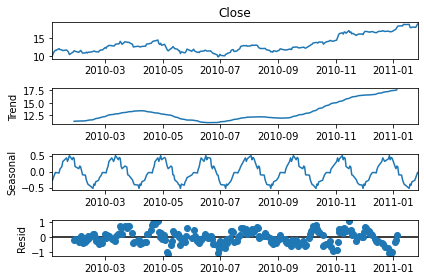

In [198]:
# Ejemplo de descomposición de serie de tiempo
#aditivo o multiplicativo tipo de modelo
descomposicion = sm.tsa.seasonal_decompose(df["Close"].dropna(),model='additive', freq=30)  
fig = descomposicion.plot()


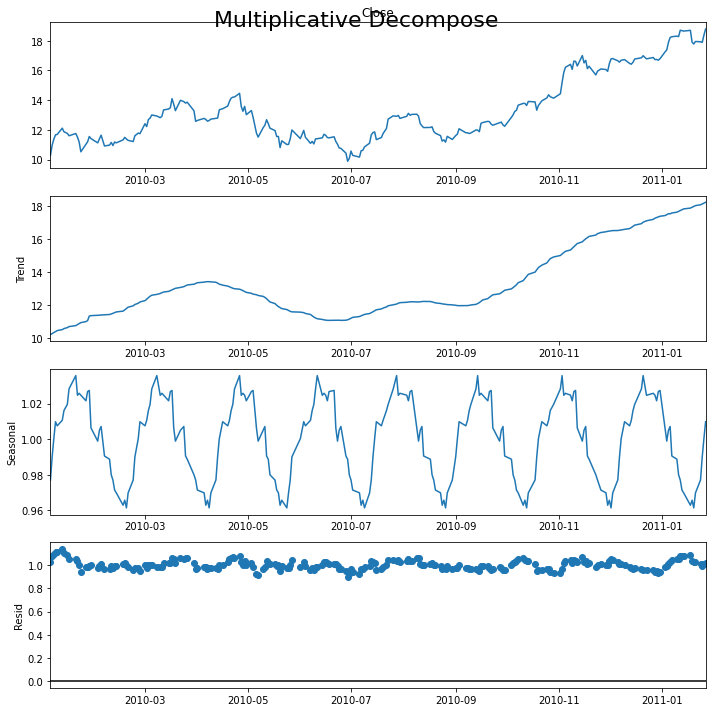

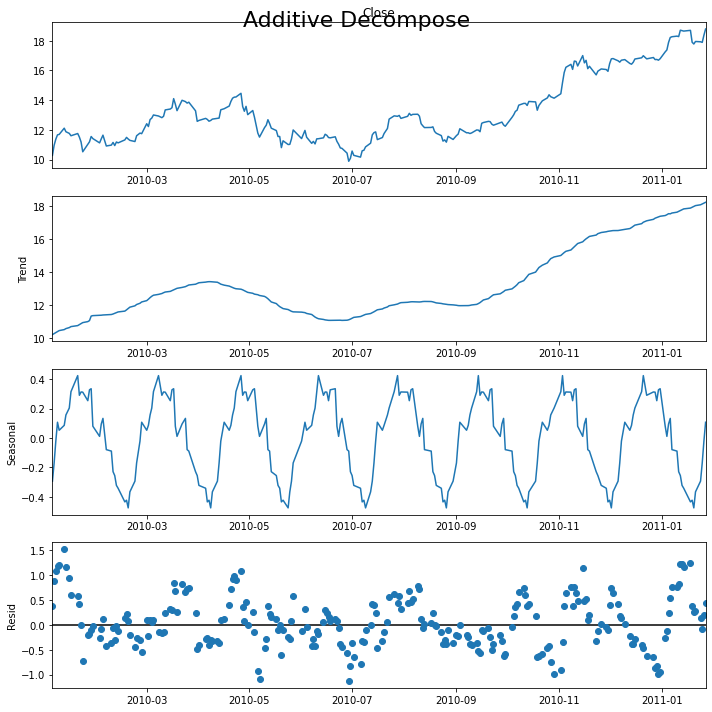

In [199]:
from statsmodels.tsa.seasonal import seasonal_decompose
#https://miningthedetails.com/blog/r/TimeSeriesDecomposition/

#El establecimiento de extrapolate_trend = 'freq' se ocupa de los valores perdidos en la tendencia 
#y los residuos al comienzo de la serie.
# Descomposición Multiplicativa
result_mul = seasonal_decompose(df['Close'].dropna(), model='multiplicative', extrapolate_trend='freq',freq=30)

# Descomposición Aditiva
result_add = seasonal_decompose(df['Close'].dropna(), model='additive', extrapolate_trend='freq',freq=30)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [200]:
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']

In [201]:
df_reconstructed

seas      trend     resid  actual_values
Date                                                    
2010-01-04  0.977071  10.199997  1.031495      10.280000
2010-01-05  0.990028  10.260709  1.078912      10.960000
2010-01-06  1.000267  10.321421  1.101299      11.370000
2010-01-07  1.009796  10.382133  1.112188      11.660000
2010-01-08  1.007495  10.442845  1.111099      11.690000
...              ...        ...       ...            ...
2011-01-21  0.969780  18.044327  1.025771      17.950001
2011-01-24  0.977071  18.094391  1.014169      17.930000
2011-01-25  0.990028  18.144456  0.995908      17.889999
2011-01-26  1.000267  18.194521  1.009376      18.370001
2011-01-27  1.009796  18.244586  1.019904      18.790001

[244 rows x 4 columns]

In [202]:
df_reconstructed["trend"].diff().mean()

0.03310530420869745

**Mann-Kendall Test**

sudo pip install pymannkendall
https://pypi.org/project/pymannkendall/

- Ho: No existe tendencia a lo largo del tiempo en la variable evaluada
- Si p-valuez<alpha entonces rechazamos Ho

In [203]:
import numpy as np
import pymannkendall as mk
from scipy import stats


result = mk.original_test(df["Close"].dropna())
print(result)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=11.4508193138905, Tau=0.4922417864130068, s=14593.0, var_s=1623889.6666666667, slope=0.02363638444380327, intercept=9.75817940451882)


**MISSINGS**

In [204]:
#FFILL (ANTERIOR)
df["Close_ffill"]=df["Close"].fillna(method="ffill")

#BFILL (POSTERIOR)
df["Close_bfill"]=df["Close"].fillna(method="bfill")

In [205]:
#http://www4.ujaen.es/~angelcid/Archivos/An_Met_Num_INFORMATICA/Splines.pdf
#Interpolación lineal
df["Int_l_Close"]=df["Close"].interpolate(method="linear")
#Spline 
df["Spline_Close"]=df["Close"].interpolate(method="spline",order=2)

In [209]:
#p-value mayor y estadistico pequeño
originales=list(df["Close"].dropna().values)
imputados=list(df["Close_ffill"].values)
stats.ks_2samp(originales,imputados)

KstestResult(statistic=0.01618093503339405, pvalue=0.9999999999993588)

# LINK TESTS
https://help.xlstat.com/s/article/que-prueba-estadistica-deberia-utilizar?language=es

## REDUCCION DE DIMENSIONES

In [210]:
X_train["v_GarageYrBlt"]=X_train["v_GarageYrBlt"].astype(int)
X_test["v_GarageYrBlt"]=X_test["v_GarageYrBlt"].astype(int)

In [213]:
df_aux=pd.concat([X_test,X_train],sort=True)

df_aux=df_aux.reset_index().sort_values(by="index",axis=0).drop(columns=["index"])

X_train_1,X_test_1=train_test_split(aux,test_size=.2,random_state=413)

In [215]:
df_aux

Id  c_1stFlrSF  c_2ndFlrSF  c_3SsnPorch  c_BedroomAbvGr  c_BsmtFinSF1  \
656     1       856.0       854.0          0.0             3.0         706.0   
183     2      1262.0         0.0          0.0             3.0         978.0   
790     3       920.0       866.0          0.0             3.0         486.0   
251     5      1145.0      1053.0          0.0             4.0         655.0   
254     7      1694.0         0.0          0.0             3.0        1369.0   
..    ...         ...         ...          ...             ...           ...   
281  1453      1072.0         0.0          0.0             2.0         547.0   
684  1454      1140.0         0.0          0.0             3.0           0.0   
342  1455      1221.0         0.0          0.0             2.0         410.0   
310  1456       953.0       694.0          0.0             3.0           0.0   
60   1457      2073.0         0.0          0.0             3.0         790.0   

     c_BsmtFinSF2  c_BsmtFullBath  c_BsmtUnfSF  c_EnclosedPorch  c_GarageArea  \
656           0.0             1.0        150.0              0.0         548.0   
183           0.0             0.0        284.0              0.0         460.0   
790           0.0             1.0        434.0              0.0         608.0   
251           0.0             1.0        490.0              0.0         836.0   
254           0.0             1.0        317.0              0.0         636.0   
..            ...             ...          ...              ...           ...   
281           0.0             1.0          0.0              0.0         525.0   
684           0.0             0.0       1140.0              0.0           0.0   
342           0.0             1.0        811.0              0.0         400.0   
310           0.0             0.0        953.0              0.0         460.0   
60          163.0             1.0        589.0              0.0         500.0   

     c_GarageCars  c_GrLivArea  c_HalfBath  c_LotArea  c_LotFrontage  \
656           2.0       1710.0         1.0     8450.0           65.0   
183           2.0       1262.0         0.0     9600.0           80.0   
790           2.0       1786.0         1.0    11250.0           68.0   
251           3.0       2198.0         1.0    14260.0           84.0   
254           2.0       1694.0         0.0    10084.0           75.0   
..            ...          ...         ...        ...            ...   
281           2.0       1072.0         0.0     3675.0           35.0   
684           0.0       1140.0         0.0    17217.0           90.0   
342           2.0       1221.0         0.0     7500.0           62.0   
310           2.0       1647.0         1.0     7917.0           62.0   
60            2.0       2073.0         0.0    13175.0           85.0   

     c_MasVnrArea  c_MiscVal  c_OpenPorchSF  c_PoolArea  c_ScreenPorch  \
656         196.0        0.0           61.0         0.0            0.0   
183           0.0        0.0            0.0         0.0            0.0   
790         162.0        0.0           42.0         0.0            0.0   
251         350.0        0.0           84.0         0.0            0.0   
254         186.0        0.0           57.0         0.0            0.0   
..            ...        ...            ...         ...            ...   
281          80.0        0.0           28.0         0.0            0.0   
684           0.0        0.0           56.0         0.0            0.0   
342           0.0        0.0          113.0         0.0            0.0   
310           0.0        0.0           40.0         0.0            0.0   
60          119.0        0.0            0.0         0.0            0.0   

     c_TotRmsAbvGrd  c_TotalBsmtSF  c_WoodDeckSF  tgt_SalePrice v_BldgType  \
656             8.0          856.0           0.0         208500       1Fam   
183             6.0         1262.0         298.0         181500       1Fam   
790             6.0          920.0           0.0         223500       1Fam   
251    

In [216]:
df_aux["v_MasVnrType"]=df_aux["v_MasVnrType"].replace({"none":np.nan})

In [217]:
df_aux["v_YearRemodAdd"]=df_aux["v_YearRemodAdd"].astype(int)
df_aux["v_YrSold"]=df_aux["v_YrSold"].astype(int)

In [219]:
for col in df_aux.filter(like="v_"):
    df_aux[col]=df_aux[col].fillna("nan").astype(str).map(text_clean).replace("nan",np.nan)

In [220]:
dictio=dict(zip(["ex","gd","ta","fa","po"],[3,3,2,1,1]))

In [221]:
df_aux["v_BsmtCond"]=df_aux["v_BsmtCond"].replace(dictio)
df_aux["v_BsmtQual"]=df_aux["v_BsmtQual"].replace(dictio)

df_aux["v_ExterCond"]=df_aux["v_ExterCond"].replace(dictio)
df_aux["v_ExterQual"]=df_aux["v_ExterQual"].replace(dictio)

df_aux["v_HeatingQC"]=df_aux["v_HeatingQC"].replace(dictio)
df_aux["v_KitchenQual"]=df_aux["v_KitchenQual"].replace(dictio)

In [222]:
def other(df,col,n):
    aux=list(df[col].value_counts(1).index[n:].values)
    dictio_aux=dict(zip(aux,["otro"]*len(aux)))
    df[col]=df[col].replace(dictio_aux)
    return df

In [223]:
dictionary={"v_BldgType":1,"v_Foundation":2,"v_Functional":1,"v_Heating":1,"v_HouseStyle":3,"v_LandContour":1,
"v_LandSlope":1,"v_LotConfig":2,"v_LotShape":1,"v_MSZoning":2,"v_RoofMatl":1,"v_RoofStyle":2,"v_SaleCondition":1,
"v_SaleType":1,"v_Condition2":1,"v_Condition1":1,"v_BsmtFinType2":1,"v_BsmtFinType1":3,"v_BsmtExposure":1}

In [224]:
for i,j in dictionary.items():
    df_aux=other(df_aux,i,j)

In [225]:
for col in df_aux.filter(like="v_"):
    print(col)
    df_aux[col]=df_aux[col].fillna("nan").astype(str).map(text_clean).replace("nan",np.nan)
    print(df_aux[col].value_counts(1))
    print("\n")

v_BldgType
1fam    0.862812
otro    0.137188
Name: v_BldgType, dtype: float64


v_BsmtCond
2    0.925170
3    0.037415
1    0.037415
Name: v_BsmtCond, dtype: float64


v_BsmtExposure
no      0.701814
otro    0.298186
Name: v_BsmtExposure, dtype: float64


v_BsmtFinType1
unf     0.321995
glq     0.316327
otro    0.223356
alq     0.138322
Name: v_BsmtFinType1, dtype: float64


v_BsmtFinType2
unf     0.935374
otro    0.064626
Name: v_BsmtFinType2, dtype: float64


v_BsmtHalfBath
0    0.953515
1    0.045351
2    0.001134
Name: v_BsmtHalfBath, dtype: float64


v_BsmtQual
3    0.527211
2    0.444444
1    0.028345
Name: v_BsmtQual, dtype: float64


v_CentralAir
y    0.942177
n    0.057823
Name: v_CentralAir, dtype: float64


v_Condition1
norm    0.877551
otro    0.122449
Name: v_Condition1, dtype: float64


v_Condition2
norm    0.99093
otro    0.00907
Name: v_Condition2, dtype: float64


v_Electrical
sbrkr    0.916100
fusea    0.063492
otro     0.020408
Name: v_Electrical, dtype: float64


v_

In [226]:
dummy_vars=["v_BldgType","v_BsmtExposure","v_BsmtFinType1","v_BsmtFinType2","v_CentralAir","v_Condition1","v_Condition2","v_Electrical","v_Foundation",
"v_Functional","v_GarageFinish","v_GarageType","v_Heating","v_HouseStyle","v_LandContour","v_LandSlope","v_LotConfig","v_LotShape","v_MSZoning","v_PavedDrive","v_RoofMatl","v_RoofStyle","v_SaleCondition","v_SaleType"]

In [227]:
dummy=pd.get_dummies(df_aux[dummy_vars])

In [228]:
df_aux=pd.concat([df_aux[[x for x in df_aux if x not in dummy_vars]],dummy],axis=1)

In [229]:
df_aux

Id  c_1stFlrSF  c_2ndFlrSF  c_3SsnPorch  c_BedroomAbvGr  c_BsmtFinSF1  \
656     1       856.0       854.0          0.0             3.0         706.0   
183     2      1262.0         0.0          0.0             3.0         978.0   
790     3       920.0       866.0          0.0             3.0         486.0   
251     5      1145.0      1053.0          0.0             4.0         655.0   
254     7      1694.0         0.0          0.0             3.0        1369.0   
..    ...         ...         ...          ...             ...           ...   
281  1453      1072.0         0.0          0.0             2.0         547.0   
684  1454      1140.0         0.0          0.0             3.0           0.0   
342  1455      1221.0         0.0          0.0             2.0         410.0   
310  1456       953.0       694.0          0.0             3.0           0.0   
60   1457      2073.0         0.0          0.0             3.0         790.0   

     c_BsmtFinSF2  c_BsmtFullBath  c_BsmtUnfSF  c_EnclosedPorch  c_GarageArea  \
656           0.0             1.0        150.0              0.0         548.0   
183           0.0             0.0        284.0              0.0         460.0   
790           0.0             1.0        434.0              0.0         608.0   
251           0.0             1.0        490.0              0.0         836.0   
254           0.0             1.0        317.0              0.0         636.0   
..            ...             ...          ...              ...           ...   
281           0.0             1.0          0.0              0.0         525.0   
684           0.0             0.0       1140.0              0.0           0.0   
342           0.0             1.0        811.0              0.0         400.0   
310           0.0             0.0        953.0              0.0         460.0   
60          163.0             1.0        589.0              0.0         500.0   

     c_GarageCars  c_GrLivArea  c_HalfBath  c_LotArea  c_LotFrontage  \
656           2.0       1710.0         1.0     8450.0           65.0   
183           2.0       1262.0         0.0     9600.0           80.0   
790           2.0       1786.0         1.0    11250.0           68.0   
251           3.0       2198.0         1.0    14260.0           84.0   
254           2.0       1694.0         0.0    10084.0           75.0   
..            ...          ...         ...        ...            ...   
281           2.0       1072.0         0.0     3675.0           35.0   
684           0.0       1140.0         0.0    17217.0           90.0   
342           2.0       1221.0         0.0     7500.0           62.0   
310           2.0       1647.0         1.0     7917.0           62.0   
60            2.0       2073.0         0.0    13175.0           85.0   

     c_MasVnrArea  c_MiscVal  c_OpenPorchSF  c_PoolArea  c_ScreenPorch  \
656         196.0        0.0           61.0         0.0            0.0   
183           0.0        0.0            0.0         0.0            0.0   
790         162.0        0.0           42.0         0.0            0.0   
251         350.0        0.0           84.0         0.0            0.0   
254         186.0        0.0           57.0         0.0            0.0   
..            ...        ...            ...         ...            ...   
281          80.0        0.0           28.0         0.0            0.0   
684           0.0        0.0           56.0         0.0            0.0   
342           0.0        0.0          113.0         0.0            0.0   
310           0.0        0.0           40.0         0.0            0.0   
60          119.0        0.0            0.0         0.0            0.0   

     c_TotRmsAbvGrd  c_TotalBsmtSF  c_WoodDeckSF  tgt_SalePrice v_BsmtCond  \
656             8.0          856.0           0.0         208500          2   
183             6.0         1262.0         298.0         181500          2   
790             6.0          920.0           0.0         223500          2   
251    

### Relación de valor perdido

In [230]:
completitud(df_aux)

columna  total  completitud
0            v_MasVnrType    537    39.115646
1       v_GarageType_otro      0   100.000000
2     v_GarageType_detchd      0   100.000000
3    v_GarageType_builtin      0   100.000000
4     v_GarageType_attchd      0   100.000000
..                    ...    ...          ...
103          v_Fireplaces      0   100.000000
104           v_ExterQual      0   100.000000
105           v_ExterCond      0   100.000000
106        v_BsmtHalfBath      0   100.000000
107         v_SaleType_wd      0   100.000000

[108 rows x 3 columns]

In [231]:
df_aux.drop(columns=["v_MasVnrType"],inplace=True)

### Filtro de baja varianza

In [232]:
df_aux.filter(like="c_").describe(percentiles=np.arange(0.1,1.1,.1))

c_1stFlrSF   c_2ndFlrSF  c_3SsnPorch  c_BedroomAbvGr  c_BsmtFinSF1  \
count   882.000000   882.000000        882.0      882.000000    882.000000   
mean   1095.534014   307.314059          0.0        2.787982    436.871882   
std     309.876841   398.719542          0.0        0.689925    411.238340   
min     438.000000     0.000000          0.0        1.000000      0.000000   
10%     764.000000     0.000000          0.0        2.000000      0.000000   
20%     832.000000     0.000000          0.0        2.000000      0.000000   
30%     888.000000     0.000000          0.0        3.000000      0.000000   
40%     953.000000     0.000000          0.0        3.000000    260.200000   
50%    1037.000000     0.000000          0.0        3.000000    411.000000   
60%    1127.600000   280.200000          0.0        3.000000    547.000000   
70%    1225.100000   601.400000          0.0        3.000000    661.700000   
80%    1372.000000   749.600000          0.0        3.000000    789.800000   
90%    1560.600000   884.900000          0.0        4.000000   1001.800000   
100%   2117.000000  1349.000000          0.0        4.000000   1646.000000   
max    2117.000000  1349.000000          0.0        4.000000   1646.000000   

       c_BsmtFinSF2  c_BsmtFullBath  c_BsmtUnfSF  c_EnclosedPorch  \
count    882.000000      882.000000   882.000000       882.000000   
mean      13.605442        0.403628   575.026077        13.609977   
std       57.880701        0.497791   401.473696        39.025296   
min        0.000000        0.000000     0.000000         0.000000   
10%        0.000000        0.000000   108.200000         0.000000   
20%        0.000000        0.000000   198.400000         0.000000   
30%        0.000000        0.000000   304.000000         0.000000   
40%        0.000000        0.000000   403.400000         0.000000   
50%        0.000000        0.000000   502.500000         0.000000   
60%        0.000000        0.600000   625.000000         0.000000   
70%        0.000000        1.000000   747.000000         0.000000   
80%        0.000000        1.000000   893.800000         0.000000   
90%        0.000000        1.000000  1193.700000        76.100000   
100%     396.000000        2.000000  1680.000000       180.000000   
max      396.000000        2.000000  1680.000000       180.000000   

       c_GarageArea  c_GarageCars  c_GrLivArea  c_HalfBath     c_LotArea  \
count    882.000000    882.000000   882.000000  882.000000    882.000000   
mean     453.825397      1.713152  1406.973923    0.344671   9025.119048   
std      197.961481      0.713441   410.343341    0.475531   2901.397826   
min        0.000000      0.000000   438.000000    0.000000   1974.000000   
10%      240.000000      1.000000   886.600000    0.000000   5130.300000   
20%      284.400000      1.000000  1034.000000    0.000000   6915.000000   
30%      360.000000      1.000000  1144.000000    0.000000   7752.400000   
40%      430.400000      2.000000  1266.000000    0.000000   8450.000000   
50%      470.500000      2.000000  1384.000000    0.000000   9000.000000   
60%      499.600000      2.000000  1494.000000    0.000000   9596.400000   
70%      542.400000      2.000000  1602.700000    1.000000  10254.700000   
80%      591.600000      2.000000  1719.800000    1.000000  11215.600000   
90%      688.700000      2.000000  1948.900000    1.000000  12631.200000   
100%     936.000000      3.000000  2727.000000    1.000000  17600.000000   
max      936.000000      3.000000  2727.000000    1.000000  17600.000000   

       c_LotFrontage  c_MasVnrArea  c_MiscVal  c_OpenPorchSF  c_PoolArea  \
count     882.000000    882.000000      882.0     882.000000       882.0   
mean       66.778912     72.274376        0.0      36.531746         0.0   
std        14.469346    112.551956        0.0      45.178918         0.0   
min        30.000000      0.000000        0.0       0.000000         0.0   
10%        50.000000      0.000000        0.0       0.000

In [233]:
df_aux.drop(columns=["c_3SsnPorch","c_MiscVal","c_PoolArea"],inplace=True)

### Filtro de alta correlación

- La Correlación se utiliza para probar las relaciones entre variables cuantitativas o variables categóricas. En otras palabras, es una medida de cómo se relacionan las cosas. El estudio de cómo se correlacionan las variables se denomina análisis de correlación.
- Un coeficiente de correlación proporciona un resumen numérico del grado de asociación entre dos variables.
- Tipos:
- **Correlación r de Pearson: la correlación r de Pearson es el estadístico de correlación más utilizado para medir el grado de relación entre variables relacionadas linealmente. Por ejemplo, en el mercado de valores, si queremos medir cómo se relacionan dos acciones entre sí, se utiliza la correlación r de Pearson para medir el grado de relación entre las dos. La correlación punto-biserial se realiza con la fórmula de correlación de Pearson excepto que una de las variables es dicotómica.**
- **Correlación de rango de Kendall: la correlación de rango de Kendall es una prueba no paramétrica que mide la fuerza de la dependencia entre dos variables. Si consideramos dos muestras, ayb, donde cada tamaño de muestra es n, sabemos que el número total de emparejamientos con a b es n (n-1) / 2.**
- **Correlación de rango de Spearman: la correlación de rango de Spearman es una prueba no paramétrica que se utiliza para medir el grado de asociación entre dos variables. La prueba de correlación de rango de Spearman no conlleva ninguna suposición sobre la distribución de los datos y es el análisis de correlación apropiado cuando las variables se miden en una escala que es al menos ordinal.**

In [234]:
df_aux[[x for x in df_aux if x!="tgt_SalePrice"]].corr(method="spearman").iplot(kind="heatmap",colorscale="orrd",title="Matriz de Correlación")

In [235]:
corr=df_aux[[x for x in df_aux if x!="tgt_SalePrice"]].corr(method="spearman")

In [236]:
corr=abs(corr)

In [238]:
corr

Id  c_1stFlrSF  c_2ndFlrSF  c_BedroomAbvGr  \
Id                      1.000000    0.012102    0.020337        0.016180   
c_1stFlrSF              0.012102    1.000000    0.372270        0.086604   
c_2ndFlrSF              0.020337    0.372270    1.000000        0.490574   
c_BedroomAbvGr          0.016180    0.086604    0.490574        1.000000   
c_BsmtFinSF1            0.004554    0.353189    0.241174        0.058272   
...                          ...         ...         ...             ...   
v_RoofStyle_otro        0.022123    0.073395    0.094457        0.066707   
v_SaleCondition_normal  0.015487    0.113249    0.084203        0.059678   
v_SaleCondition_otro    0.015487    0.113249    0.084203        0.059678   
v_SaleType_otro         0.023828    0.178489    0.067880        0.060556   
v_SaleType_wd           0.023828    0.178489    0.067880        0.060556   

                        c_BsmtFinSF1  c_BsmtFinSF2  c_BsmtFullBath  \
Id                          0.004554      0.014476        0.029072   
c_1stFlrSF                  0.353189      0.005069        0.216846   
c_2ndFlrSF                  0.241174      0.058244        0.184066   
c_BedroomAbvGr              0.058272      0.042647        0.111586   
c_BsmtFinSF1                1.000000      0.085135        0.674239   
...                              ...           ...             ...   
v_RoofStyle_otro            0.027229      0.059166        0.043863   
v_SaleCondition_normal      0.079267      0.065839        0.040870   
v_SaleCondition_otro        0.079267      0.065839        0.040870   
v_SaleType_otro             0.047664      0.078368        0.019844   
v_SaleType_wd               0.047664      0.078368        0.019844   

                        c_BsmtUnfSF  c_EnclosedPorch  c_GarageArea  \
Id                         0.027944         0.031392      0.032039   
c_1stFlrSF                 0.226058         0.193012      0.441600   
c_2ndFlrSF                 0.008485         0.033776      0.066856   
c_BedroomAbvGr             0.084391         0.083166      0.102674   
c_BsmtFinSF1               0.719337         0.219180      0.247902   
...                             ...              ...           ...   
v_RoofStyle_otro           0.047277         0.093296      0.094712   
v_SaleCondition_normal     0.178992         0.051860      0.127142   
v_SaleCondition_otro       0.178992         0.051860      0.127142   
v_SaleType_otro            0.155978         0.079907      0.186126   
v_SaleType_wd              0.155978         0.079907      0.186126   

                        c_GarageCars  c_GrLivArea  c_HalfBath  c_LotArea  \
Id                          0.039448     0.031451    0.002689   0.031961   
c_1stFlrSF                  0.404467     0.384592    0.195883   0.305686   
c_2ndFlrSF                  0.146348     0.665275    0.675715   0.127376   
c_BedroomAbvGr              0.116350     0.534245    0.349738   0.401031   
c_BsmtFinSF1                0.174983     0.022740    0.069917   0.154562   
...                              ...          ...         ...        ...   
v_RoofStyle_otro            0.082251     0.032828    0.010066   0.031019   
v_SaleCondition_normal      0.132343     0.028894    0.052445   0.034745   
v_SaleCondition_otro        0.132343     0.028894    0.052445   0.034745   
v_SaleType_otro             0.203376     0.102731    0.011937   0.060051   
v_SaleType_wd               0.203376     0.102731    0.011937   0.060051   

                        c_LotFrontage  c_MasVnrArea  c_OpenPorchSF  \
Id                           0.056554      0.024482       0.011905   
c_1stFlrSF                   0.295630      0.393916       0.207390   
c_2ndFlrSF                   0.088070      0.019401       0.242719   
c_BedroomAbvGr               0.327223      0.104223       0.111888   
c_BsmtFinSF1                 0.162694      0.257048       0.060333   
...                               ...           ...            ...   
v_RoofStyle_otro             0.0

In [237]:
for col in corr.columns:
    display(corr[[col]][corr[[col]]>.8].dropna())

Id
Id  1.0

c_1stFlrSF
c_1stFlrSF       1.000000
c_TotalBsmtSF    0.884848

c_2ndFlrSF
c_2ndFlrSF             1.000000
v_HouseStyle_1story    0.817999
v_HouseStyle_2story    0.852862

c_BedroomAbvGr
c_BedroomAbvGr             1.0

c_BsmtFinSF1
c_BsmtFinSF1            1.000000
v_BsmtFinType1_unf      0.823145

c_BsmtFinSF2
c_BsmtFinSF2             1.000000
v_BsmtFinType2_otro      0.999257
v_BsmtFinType2_unf       0.999257

c_BsmtFullBath
c_BsmtFullBath             1.0

c_BsmtUnfSF
c_BsmtUnfSF          1.0

c_EnclosedPorch
c_EnclosedPorch              1.0

c_GarageArea
c_GarageArea      1.000000
c_GarageCars      0.836284

c_GarageCars
c_GarageArea      0.836284
c_GarageCars      1.000000

c_GrLivArea
c_GrLivArea        1.000000
c_TotRmsAbvGrd     0.820829

c_HalfBath
c_HalfBath         1.0

c_LotArea
c_LotArea        1.0

c_LotFrontage
c_LotFrontage            1.0

c_MasVnrArea
c_MasVnrArea           1.0

c_OpenPorchSF
c_OpenPorchSF            1.0

c_ScreenPorch
c_ScreenPorch            1.0

c_TotRmsAbvGrd
c_GrLivArea           0.820829
c_TotRmsAbvGrd        1.000000

c_TotalBsmtSF
c_1stFlrSF          0.884848
c_TotalBsmtSF       1.000000

c_WoodDeckSF
c_WoodDeckSF           1.0

v_BldgType_1fam
v_BldgType_1fam              1.0
v_BldgType_otro              1.0

v_BldgType_otro
v_BldgType_1fam              1.0
v_BldgType_otro              1.0

v_BsmtExposure_no
v_BsmtExposure_no                  1.0
v_BsmtExposure_otro                1.0

v_BsmtExposure_otro
v_BsmtExposure_no                    1.0
v_BsmtExposure_otro                  1.0

v_BsmtFinType1_alq
v_BsmtFinType1_alq                 1.0

v_BsmtFinType1_glq
v_BsmtFinType1_glq                 1.0

v_BsmtFinType1_otro
v_BsmtFinType1_otro                  1.0

v_BsmtFinType1_unf
c_BsmtFinSF1                  0.823145
v_BsmtFinType1_unf            1.000000

v_BsmtFinType2_otro
c_BsmtFinSF2                    0.999257
v_BsmtFinType2_otro             1.000000
v_BsmtFinType2_unf              1.000000

v_BsmtFinType2_unf
c_BsmtFinSF2                   0.999257
v_BsmtFinType2_otro            1.000000
v_BsmtFinType2_unf             1.000000

v_CentralAir_n
v_CentralAir_n             1.0
v_CentralAir_y             1.0

v_CentralAir_y
v_CentralAir_n             1.0
v_CentralAir_y             1.0

v_Condition1_norm
v_Condition1_norm                1.0
v_Condition1_otro                1.0

v_Condition1_otro
v_Condition1_norm                1.0
v_Condition1_otro                1.0

v_Condition2_norm
v_Condition2_norm                1.0
v_Condition2_otro                1.0

v_Condition2_otro
v_Condition2_norm                1.0
v_Condition2_otro                1.0

v_Electrical_fusea
v_Electrical_fusea            1.000000
v_Electrical_sbrkr            0.860387

v_Electrical_otro
v_Electrical_otro                1.0

v_Electrical_sbrkr
v_Electrical_fusea            0.860387
v_Electrical_sbrkr            1.000000

v_Foundation_cblock
v_Foundation_cblock             1.000000
v_Foundation_pconc              0.800064

v_Foundation_otro
v_Foundation_otro                1.0

v_Foundation_pconc
v_Foundation_cblock            0.800064
v_Foundation_pconc             1.000000

v_Functional_otro
v_Functional_otro                1.0
v_Functional_typ                 1.0

v_Functional_typ
v_Functional_otro               1.0
v_Functional_typ                1.0

v_GarageFinish_fin
v_GarageFinish_fin                 1.0

v_GarageFinish_rfn
v_GarageFinish_rfn                 1.0

v_GarageFinish_unf
v_GarageFinish_unf                 1.0

v_GarageType_attchd
v_GarageType_attchd             1.000000
v_GarageType_detchd             0.842743

v_GarageType_builtin
v_GarageType_builtin                   1.0

v_GarageType_detchd
v_GarageType_attchd             0.842743
v_GarageType_detchd             1.000000

v_GarageType_otro
v_GarageType_otro                1.0

v_Heating_gasa
v_Heating_gasa             1.0
v_Heating_otro             1.0

v_Heating_otro
v_Heating_gasa             1.0
v_Heating_otro             1.0

v_HouseStyle_1 5fin
v_HouseStyle_1 5fin                  1.0

v_HouseStyle_1story
c_2ndFlrSF                      0.817999
v_HouseStyle_1story             1.000000

v_HouseStyle_2story
c_2ndFlrSF                      0.852862
v_HouseStyle_2story             1.000000

v_HouseStyle_otro
v_HouseStyle_otro                1.0

v_LandContour_lvl
v_LandContour_lvl                 1.0
v_LandContour_otro                1.0

v_LandContour_otro
v_LandContour_lvl                  1.0
v_LandContour_otro                 1.0

v_LandSlope_gtl
v_LandSlope_gtl               1.0
v_LandSlope_otro              1.0

v_LandSlope_otro
v_LandSlope_gtl                1.0
v_LandSlope_otro               1.0

v_LotConfig_corner
v_LotConfig_corner                 1.0

v_LotConfig_inside
v_LotConfig_inside                 1.0

v_LotConfig_otro
v_LotConfig_otro               1.0

v_LotShape_otro
v_LotShape_otro              1.0
v_LotShape_reg               1.0

v_LotShape_reg
v_LotShape_otro             1.0
v_LotShape_reg              1.0

v_MSZoning_otro
v_MSZoning_otro              1.0

v_MSZoning_rl
v_MSZoning_rl            1.0

v_MSZoning_rm
v_MSZoning_rm            1.0

v_PavedDrive_n
v_PavedDrive_n         1.00000
v_PavedDrive_y         0.82746

v_PavedDrive_p
v_PavedDrive_p             1.0

v_PavedDrive_y
v_PavedDrive_n         0.82746
v_PavedDrive_y         1.00000

v_RoofMatl_compshg
v_RoofMatl_compshg                 1.0
v_RoofMatl_otro                    1.0

v_RoofMatl_otro
v_RoofMatl_compshg              1.0
v_RoofMatl_otro                 1.0

v_RoofStyle_gable
v_RoofStyle_gable           1.000000
v_RoofStyle_hip             0.957942

v_RoofStyle_hip
v_RoofStyle_gable         0.957942
v_RoofStyle_hip           1.000000

v_RoofStyle_otro
v_RoofStyle_otro               1.0

v_SaleCondition_normal
v_SaleCondition_normal                     1.0
v_SaleCondition_otro                       1.0

v_SaleCondition_otro
v_SaleCondition_normal                   1.0
v_SaleCondition_otro                     1.0

v_SaleType_otro
v_SaleType_otro              1.0
v_SaleType_wd                1.0

v_SaleType_wd
v_SaleType_otro            1.0
v_SaleType_wd              1.0

In [239]:
cols=["v_HouseStyle_1story","v_BsmtFinType2_unf","c_TotalBsmtSF","c_TotRmsAbvGrd","c_GrLivArea","c_GarageCars","c_GarageArea","c_BsmtFinSF2","c_2ndFlrSF","c_1stFlrSF"]

In [240]:
for col in cols:
    display(corr[[col]][corr[[col]]>.8].dropna())

v_HouseStyle_1story
c_2ndFlrSF                      0.817999
v_HouseStyle_1story             1.000000

v_BsmtFinType2_unf
c_BsmtFinSF2                   0.999257
v_BsmtFinType2_otro            1.000000
v_BsmtFinType2_unf             1.000000

c_TotalBsmtSF
c_1stFlrSF          0.884848
c_TotalBsmtSF       1.000000

c_TotRmsAbvGrd
c_GrLivArea           0.820829
c_TotRmsAbvGrd        1.000000

c_GrLivArea
c_GrLivArea        1.000000
c_TotRmsAbvGrd     0.820829

c_GarageCars
c_GarageArea      0.836284
c_GarageCars      1.000000

c_GarageArea
c_GarageArea      1.000000
c_GarageCars      0.836284

c_BsmtFinSF2
c_BsmtFinSF2             1.000000
v_BsmtFinType2_otro      0.999257
v_BsmtFinType2_unf       0.999257

c_2ndFlrSF
c_2ndFlrSF             1.000000
v_HouseStyle_1story    0.817999
v_HouseStyle_2story    0.852862

c_1stFlrSF
c_1stFlrSF       1.000000
c_TotalBsmtSF    0.884848

In [1917]:
#v_HouseStyle_1story - Estilo de la vivienda
#2ndFlrSF: pies cuadrados del segundo piso

#BsmtFinType2_unf: Calidad de la segunda área terminada (si está presente) [no esta terminada]
#BsmtFinSF2: pies cuadrados con acabado type 2

#TotalBsmtSF: Total de pies cuadrados de área del sótano
#1stFlrSF: pies cuadrados del primer piso

#TotRmsAbvGrd: Total de habitaciones sobre rasante (no incluye baños)
#GrLivArea: pies cuadrados de área habitable sobre el nivel (suelo)

#GarageCars: Tamaño del garaje en capacidad de automóvil
#GarageArea: Tamaño del garaje en pies cuadrados

In [241]:
df_aux=df_aux.drop(columns=["v_HouseStyle_1story","v_BsmtFinType2_unf","c_TotalBsmtSF","c_TotRmsAbvGrd","c_GarageCars"])

### Correlación (con el objetivo)


In [242]:
corr=df_aux.corr(method="spearman")

In [243]:
corr=abs(corr)

In [244]:
corr[["tgt_SalePrice"]].sort_values(by = 'tgt_SalePrice',ascending = False).style.background_gradient()

In [245]:
corr=corr[["tgt_SalePrice"]].sort_values(by = 'tgt_SalePrice',ascending = False)

In [246]:
cols_drop_low_corr=list(corr[corr["tgt_SalePrice"]<.1].index)

In [247]:
cols_drop_low_corr

['v_GarageType_otro',
 'c_BsmtFinSF2',
 'v_BsmtFinType2_otro',
 'v_MSZoning_otro',
 'v_SaleCondition_normal',
 'v_SaleCondition_otro',
 'v_LotConfig_inside',
 'v_LotConfig_corner',
 'v_RoofStyle_hip',
 'v_LandContour_lvl',
 'v_LandContour_otro',
 'v_RoofStyle_otro',
 'v_RoofStyle_gable',
 'v_RoofMatl_compshg',
 'v_RoofMatl_otro',
 'v_LandSlope_otro',
 'v_LandSlope_gtl',
 'c_ScreenPorch',
 'Id',
 'v_BldgType_1fam',
 'v_BldgType_otro']

In [248]:
df_aux=df_aux.drop(columns=cols_drop_low_corr)

### MULTICOLINEALIDAD

In [249]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
variance_inflation_factor(X.values, i) for i in range(X.shape[1])

In [250]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [251]:
for col in df_aux.columns:
    df_aux[col]=df_aux[col].astype(float)

In [252]:
X=df_aux[[x for x in df_aux if x!="tgt_SalePrice"]]

In [253]:
aux=calc_vif(X)

In [254]:
aux

variables        VIF
0        c_1stFlrSF        inf
1        c_2ndFlrSF        inf
2    c_BedroomAbvGr   2.331676
3      c_BsmtFinSF1  13.156208
4    c_BsmtFullBath   2.409279
..              ...        ...
72   v_PavedDrive_n        inf
73   v_PavedDrive_p        inf
74   v_PavedDrive_y        inf
75  v_SaleType_otro        inf
76    v_SaleType_wd        inf

[77 rows x 2 columns]

In [255]:
aux[aux["VIF"]>5]

variables        VIF
0             c_1stFlrSF        inf
1             c_2ndFlrSF        inf
3           c_BsmtFinSF1  13.156208
5            c_BsmtUnfSF  11.176552
8            c_GrLivArea        inf
24         v_GarageYrBlt   7.607008
28        v_LowQualFinSF        inf
33           v_YearBuilt  13.172884
36     v_BsmtExposure_no        inf
37   v_BsmtExposure_otro        inf
38    v_BsmtFinType1_alq        inf
39    v_BsmtFinType1_glq        inf
40   v_BsmtFinType1_otro        inf
41    v_BsmtFinType1_unf        inf
42        v_CentralAir_n        inf
43        v_CentralAir_y        inf
44     v_Condition1_norm        inf
45     v_Condition1_otro        inf
46     v_Condition2_norm        inf
47     v_Condition2_otro        inf
48    v_Electrical_fusea        inf
49     v_Electrical_otro        inf
50    v_Electrical_sbrkr        inf
51   v_Foundation_cblock        inf
52     v_Foundation_otro        inf
53    v_Foundation_pconc        inf
54     v_Functional_otro        inf
55      v_Functional_typ        inf
56    v_GarageFinish_fin        inf
57    v_GarageFinish_rfn        inf
58    v_GarageFinish_unf        inf
59   v_GarageType_attchd  17.500427
60  v_GarageType_builtin   5.616055
61   v_GarageType_detchd  15.469834
62        v_Heating_gasa        inf
63        v_Heating_otro        inf
65   v_HouseStyle_2story  12.205184
68       v_LotShape_otro        inf
69        v_LotShape_reg        inf
72        v_PavedDrive_n        inf
73        v_PavedDrive_p        inf
74        v_PavedDrive_y        inf
75       v_SaleType_otro        inf
76         v_SaleType_wd        inf

In [256]:
cols=["c_2ndFlrSF","c_BsmtUnfSF","v_GarageYrBlt","v_BsmtExposure_otro","v_BsmtFinType1_unf","v_CentralAir_n","v_Condition1_otro",
"v_Condition2_otro","v_Electrical_otro","v_Foundation_otro","v_Functional_otro","v_GarageFinish_unf","v_GarageType_attchd","v_Heating_otro",
"v_HouseStyle_2story","v_LotShape_otro","v_PavedDrive_n","v_SaleType_otro"]

In [257]:
df_aux.filter(like="v_BsmtFinType1")

v_BsmtFinType1_alq  v_BsmtFinType1_glq  v_BsmtFinType1_otro  \
656                 0.0                 1.0                  0.0   
183                 1.0                 0.0                  0.0   
790                 0.0                 1.0                  0.0   
251                 0.0                 1.0                  0.0   
254                 0.0                 1.0                  0.0   
..                  ...                 ...                  ...   
281                 0.0                 1.0                  0.0   
684                 0.0                 0.0                  0.0   
342                 0.0                 1.0                  0.0   
310                 0.0                 0.0                  0.0   
60                  1.0                 0.0                  0.0   

     v_BsmtFinType1_unf  
656                 0.0  
183                 0.0  
790                 0.0  
251                 0.0  
254                 0.0  
..                  ...  
281                 0.0  
684                 1.0  
342                 0.0  
310                 1.0  
60                  0.0  

[882 rows x 4 columns]

In [258]:
df_aux=df_aux.drop(columns=cols)

In [259]:
X=df_aux[[x for x in df_aux if x!="tgt_SalePrice"]]

aux=calc_vif(X)

In [260]:
#GrLivArea: pies cuadrados de área habitable sobre el nivel (suelo)

In [261]:
aux

variables           VIF
0             c_1stFlrSF     46.080343
1         c_BedroomAbvGr     39.904912
2           c_BsmtFinSF1      8.387709
3         c_BsmtFullBath      3.939413
4        c_EnclosedPorch      1.678314
5           c_GarageArea     14.598062
6            c_GrLivArea     87.767617
7             c_HalfBath      4.246795
8              c_LotArea     22.868765
9          c_LotFrontage     43.314130
10          c_MasVnrArea      2.115584
11         c_OpenPorchSF      2.343635
12          c_WoodDeckSF      2.232045
13            v_BsmtCond     68.746160
14        v_BsmtHalfBath      1.299783
15            v_BsmtQual     74.080889
16           v_ExterCond     51.641294
17           v_ExterQual     77.972969
18          v_Fireplaces      2.778354
19            v_FullBath     33.331288
20          v_GarageCond    187.165457
21          v_GarageQual    145.080206
22           v_HeatingQC     47.050904
23        v_KitchenAbvGr     62.849144
24         v_KitchenQual     60.568516
25        v_LowQualFinSF      1.141481
26          v_MSSubClass      6.548927
27              v_MoSold      6.925443
28         v_OverallCond     60.113607
29         v_OverallQual     85.556449
30           v_YearBuilt  41809.670334
31        v_YearRemodAdd  29982.894569
32              v_YrSold  47693.619346
33     v_BsmtExposure_no      4.938293
34    v_BsmtFinType1_alq      2.841402
35    v_BsmtFinType1_glq      5.510116
36   v_BsmtFinType1_otro      3.604644
37        v_CentralAir_y     33.418341
38     v_Condition1_norm      9.926621
39     v_Condition2_norm    145.897401
40    v_Electrical_fusea      4.913658
41    v_Electrical_sbrkr     62.202530
42   v_Foundation_cblock      8.291558
43    v_Foundation_pconc     13.045154
44      v_Functional_typ     25.791436
45    v_GarageFinish_fin      3.343250
46    v_GarageFinish_rfn      3.546066
47  v_GarageType_builtin      1.430842
48   v_GarageType_detchd      2.765954
49        v_Heating_gasa     80.585030
50   v_HouseStyle_1 5fin      1.762609
51     v_HouseStyle_otro      1.630250
52      v_LotConfig_otro      1.333020
53        v_LotShape_reg      3.817896
54         v_MSZoning_rl     17.312824
55         v_MSZoning_rm      4.026746
56        v_PavedDrive_p      1.623468
57        v_PavedDrive_y     28.175598
58         v_SaleType_wd      8.937977

In [263]:
cols=["v_BsmtQual","v_ExterQual","v_GarageQual","v_KitchenQual","v_OverallQual","v_YrSold","v_YearRemodAdd","v_Condition2_norm"]

In [264]:
df_aux

c_1stFlrSF  c_BedroomAbvGr  c_BsmtFinSF1  c_BsmtFullBath  \
656       856.0             3.0         706.0             1.0   
183      1262.0             3.0         978.0             0.0   
790       920.0             3.0         486.0             1.0   
251      1145.0             4.0         655.0             1.0   
254      1694.0             3.0        1369.0             1.0   
..          ...             ...           ...             ...   
281      1072.0             2.0         547.0             1.0   
684      1140.0             3.0           0.0             0.0   
342      1221.0             2.0         410.0             1.0   
310       953.0             3.0           0.0             0.0   
60       2073.0             3.0         790.0             1.0   

     c_EnclosedPorch  c_GarageArea  c_GrLivArea  c_HalfBath  c_LotArea  \
656              0.0         548.0       1710.0         1.0     8450.0   
183              0.0         460.0       1262.0         0.0     9600.0   
790              0.0         608.0       1786.0         1.0    11250.0   
251              0.0         836.0       2198.0         1.0    14260.0   
254              0.0         636.0       1694.0         0.0    10084.0   
..               ...           ...          ...         ...        ...   
281              0.0         525.0       1072.0         0.0     3675.0   
684              0.0           0.0       1140.0         0.0    17217.0   
342              0.0         400.0       1221.0         0.0     7500.0   
310              0.0         460.0       1647.0         1.0     7917.0   
60               0.0         500.0       2073.0         0.0    13175.0   

     c_LotFrontage  c_MasVnrArea  c_OpenPorchSF  c_WoodDeckSF  tgt_SalePrice  \
656           65.0         196.0           61.0           0.0       208500.0   
183           80.0           0.0            0.0         298.0       181500.0   
790           68.0         162.0           42.0           0.0       223500.0   
251           84.0         350.0           84.0         192.0       250000.0   
254           75.0         186.0           57.0         255.0       307000.0   
..             ...           ...            ...           ...            ...   
281           35.0          80.0           28.0           0.0       145000.0   
684           90.0           0.0           56.0          36.0        84500.0   
342           62.0           0.0          113.0           0.0       185000.0   
310           62.0           0.0           40.0           0.0       175000.0   
60            85.0         119.0            0.0         349.0       210000.0   

     v_BsmtCond  v_BsmtHalfBath  v_BsmtQual  v_ExterCond  v_ExterQual  \
656         2.0             0.0         3.0          2.0          3.0   
183         2.0             1.0         3.0          2.0          2.0   
790         2.0             0.0         3.0          2.0          3.0   
251         2.0             0.0         3.0          2.0          3.0   
254         2.0             0.0         3.0          2.0          3.0   
..          ...             ...         ...          ...          ...   
281         2.0             0.0         3.0          2.0          2.0   
684         2.0             0.0         3.0          2.0          2.0   
342         2.0             0.0         3.0          2.0          3.0   
310         2.0             0.0         3.0          2.0          2.0   
60          2.0             0.0         3.0          2.0          2.0   

     v_Fireplaces  v_FullBath  v_GarageCond  v_GarageQual  v_HeatingQC  \
656           0.0         2.0           2.0           2.0          3.0   
183           1.0         2.0           2.0           2.0          3.0   
790           1.0         2.0           2.0           2.0          3.0   
251           1.0         2.0           2.0           2.0          3.0   
254           1.0         2.0           2.0           2.0          3.0   
..            ...         ...           ...          

In [265]:
df_aux=df_aux.drop(columns=cols)

In [266]:
X=df_aux[[x for x in df_aux if x!="tgt_SalePrice"]]

aux=calc_vif(X)

In [267]:
#BsmtCond: Estado general del sótano
#ExterCond: Estado actual del material en el exterior

In [272]:
aux[aux["VIF"]>15]

variables         VIF
0           c_1stFlrSF   44.803446
1       c_BedroomAbvGr   38.658936
6          c_GrLivArea   78.125992
8            c_LotArea   22.542750
9        c_LotFrontage   42.120071
13          v_BsmtCond   66.155892
15         v_ExterCond   49.987050
17          v_FullBath   30.166445
18        v_GarageCond  136.306107
19         v_HeatingQC   44.011759
20      v_KitchenAbvGr   57.612916
24       v_OverallCond   42.525015
25         v_YearBuilt  467.881703
30      v_CentralAir_y   31.781310
33  v_Electrical_sbrkr   60.525255
36    v_Functional_typ   24.672197
41      v_Heating_gasa   79.044243
46       v_MSZoning_rl   17.148574
49      v_PavedDrive_y   26.405352

In [1946]:
df_aux

c_1stFlrSF  c_BedroomAbvGr  c_BsmtFinSF1  c_BsmtFullBath  \
656       856.0             3.0         706.0             1.0   
183      1262.0             3.0         978.0             0.0   
790       920.0             3.0         486.0             1.0   
251      1145.0             4.0         655.0             1.0   
254      1694.0             3.0        1369.0             1.0   
..          ...             ...           ...             ...   
281      1072.0             2.0         547.0             1.0   
684      1140.0             3.0           0.0             0.0   
342      1221.0             2.0         410.0             1.0   
310       953.0             3.0           0.0             0.0   
60       2073.0             3.0         790.0             1.0   

     c_EnclosedPorch  c_GarageArea  c_GrLivArea  c_HalfBath  c_LotArea  \
656              0.0         548.0       1710.0         1.0     8450.0   
183              0.0         460.0       1262.0         0.0     9600.0   
790              0.0         608.0       1786.0         1.0    11250.0   
251              0.0         836.0       2198.0         1.0    14260.0   
254              0.0         636.0       1694.0         0.0    10084.0   
..               ...           ...          ...         ...        ...   
281              0.0         525.0       1072.0         0.0     3675.0   
684              0.0           0.0       1140.0         0.0    17217.0   
342              0.0         400.0       1221.0         0.0     7500.0   
310              0.0         460.0       1647.0         1.0     7917.0   
60               0.0         500.0       2073.0         0.0    13175.0   

     c_LotFrontage  c_MasVnrArea  c_OpenPorchSF  c_WoodDeckSF  tgt_SalePrice  \
656           65.0         196.0           61.0           0.0       208500.0   
183           80.0           0.0            0.0         298.0       181500.0   
790           68.0         162.0           42.0           0.0       223500.0   
251           84.0         350.0           84.0         192.0       250000.0   
254           75.0         186.0           57.0         255.0       307000.0   
..             ...           ...            ...           ...            ...   
281           35.0          80.0           28.0           0.0       145000.0   
684           90.0           0.0           56.0          36.0        84500.0   
342           62.0           0.0          113.0           0.0       185000.0   
310           62.0           0.0           40.0           0.0       175000.0   
60            85.0         119.0            0.0         349.0       210000.0   

     v_BsmtCond  v_BsmtHalfBath  v_ExterCond  v_Fireplaces  v_FullBath  \
656         2.0             0.0          2.0           0.0         2.0   
183         2.0             1.0          2.0           1.0         2.0   
790         2.0             0.0          2.0           1.0         2.0   
251         2.0             0.0          2.0           1.0         2.0   
254         2.0             0.0          2.0           1.0         2.0   
..          ...             ...          ...           ...         ...   
281         2.0             0.0          2.0           0.0         1.0   
684         2.0             0.0          2.0           0.0         1.0   
342         2.0             0.0          2.0           0.0         2.0   
310         2.0             0.0          2.0           1.0         2.0   
60          2.0             0.0          2.0           2.0         2.0   

     v_GarageCond  v_HeatingQC  v_KitchenAbvGr  v_LowQualFinSF  v_MSSubClass  \
656           2.0          3.0             1.0             0.0          60.0   
183           2.0          3.0             1.0             0.0          20.0   
790           2.0          3.0             1.0             0.0          60.0   
251           2.0          3.0             1.0             0.0          60.0   
254           2.0          3.0             1.0             0.0          20.0   
..   

### PCA

In [273]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**Necesitamos normalizar los datos antes del análisis de componentes principales (PCA)**
- El PCA calcula una nueva proyección de su conjunto de datos. Y el nuevo eje se basa en la desviación estándar de sus variables. Por tanto, una variable con una desviación estándar alta tendrá un peso mayor para el cálculo del eje que una variable con una desviación estándar baja. Si normaliza sus datos, todas las variables tienen la misma desviación estándar, por lo que todas las variables tienen el mismo peso y su PCA calcula el eje relevante.

In [274]:
df_aux

c_1stFlrSF  c_BedroomAbvGr  c_BsmtFinSF1  c_BsmtFullBath  \
656       856.0             3.0         706.0             1.0   
183      1262.0             3.0         978.0             0.0   
790       920.0             3.0         486.0             1.0   
251      1145.0             4.0         655.0             1.0   
254      1694.0             3.0        1369.0             1.0   
..          ...             ...           ...             ...   
281      1072.0             2.0         547.0             1.0   
684      1140.0             3.0           0.0             0.0   
342      1221.0             2.0         410.0             1.0   
310       953.0             3.0           0.0             0.0   
60       2073.0             3.0         790.0             1.0   

     c_EnclosedPorch  c_GarageArea  c_GrLivArea  c_HalfBath  c_LotArea  \
656              0.0         548.0       1710.0         1.0     8450.0   
183              0.0         460.0       1262.0         0.0     9600.0   
790              0.0         608.0       1786.0         1.0    11250.0   
251              0.0         836.0       2198.0         1.0    14260.0   
254              0.0         636.0       1694.0         0.0    10084.0   
..               ...           ...          ...         ...        ...   
281              0.0         525.0       1072.0         0.0     3675.0   
684              0.0           0.0       1140.0         0.0    17217.0   
342              0.0         400.0       1221.0         0.0     7500.0   
310              0.0         460.0       1647.0         1.0     7917.0   
60               0.0         500.0       2073.0         0.0    13175.0   

     c_LotFrontage  c_MasVnrArea  c_OpenPorchSF  c_WoodDeckSF  tgt_SalePrice  \
656           65.0         196.0           61.0           0.0       208500.0   
183           80.0           0.0            0.0         298.0       181500.0   
790           68.0         162.0           42.0           0.0       223500.0   
251           84.0         350.0           84.0         192.0       250000.0   
254           75.0         186.0           57.0         255.0       307000.0   
..             ...           ...            ...           ...            ...   
281           35.0          80.0           28.0           0.0       145000.0   
684           90.0           0.0           56.0          36.0        84500.0   
342           62.0           0.0          113.0           0.0       185000.0   
310           62.0           0.0           40.0           0.0       175000.0   
60            85.0         119.0            0.0         349.0       210000.0   

     v_BsmtCond  v_BsmtHalfBath  v_ExterCond  v_Fireplaces  v_FullBath  \
656         2.0             0.0          2.0           0.0         2.0   
183         2.0             1.0          2.0           1.0         2.0   
790         2.0             0.0          2.0           1.0         2.0   
251         2.0             0.0          2.0           1.0         2.0   
254         2.0             0.0          2.0           1.0         2.0   
..          ...             ...          ...           ...         ...   
281         2.0             0.0          2.0           0.0         1.0   
684         2.0             0.0          2.0           0.0         1.0   
342         2.0             0.0          2.0           0.0         2.0   
310         2.0             0.0          2.0           1.0         2.0   
60          2.0             0.0          2.0           2.0         2.0   

     v_GarageCond  v_HeatingQC  v_KitchenAbvGr  v_LowQualFinSF  v_MSSubClass  \
656           2.0          3.0             1.0             0.0          60.0   
183           2.0          3.0             1.0             0.0          20.0   
790           2.0          3.0             1.0             0.0          60.0   
251           2.0          3.0             1.0             0.0          60.0   
254           2.0          3.0             1.0             0.0          20.0   
..   

In [275]:
X_train,X_test=train_test_split(df_aux.filter(like="c_"),test_size=.2,random_state=413)

In [276]:
df_train=X_train[[x for x in X_train if x!="tgt_SalePrice"]]
df_test=X_train[[x for x in X_train if x!="tgt_SalePrice"]]
y_train=X_train[["tgt_SalePrice"]]
y_test=X_test[["tgt_SalePrice"]]

In [277]:
scaler = StandardScaler()
scaler.fit(df_train)
df_train_sc=pd.DataFrame(scaler.transform(df_train))
df_test_sc=pd.DataFrame(scaler.transform(df_train))

pd.to_pickle(scaler,"sc.pkl")

In [279]:
df_train_sc.describe()

0             1             2             3             4   \
count  7.050000e+02  7.050000e+02  7.050000e+02  7.050000e+02  7.050000e+02   
mean   3.073979e-16 -9.070758e-17  5.795207e-17  3.149569e-17 -2.519655e-18   
std    1.000710e+00  1.000710e+00  1.000710e+00  1.000710e+00  1.000710e+00   
min   -2.095384e+00 -2.582427e+00 -1.060954e+00 -8.070131e-01 -3.491909e-01   
25%   -7.651829e-01 -1.150003e+00 -1.060954e+00 -8.070131e-01 -3.491909e-01   
50%   -2.056033e-01  2.824212e-01 -7.708718e-02 -8.070131e-01 -3.491909e-01   
75%    6.481553e-01  2.824212e-01  7.022132e-01  1.210520e+00 -3.491909e-01   
max    3.273383e+00  1.714845e+00  2.947572e+00  3.228053e+00  4.230421e+00   

                 5             6             7             8             9   \
count  7.050000e+02  7.050000e+02  7.050000e+02  7.050000e+02  7.050000e+02   
mean  -9.196741e-17 -6.173155e-17 -1.007862e-17 -9.070758e-17  1.259828e-16   
std    1.000710e+00  1.000710e+00  1.000710e+00  1.000710e+00  1.000710e+00   
min   -2.238507e+00 -2.319523e+00 -7.412493e-01 -2.456527e+00 -2.518775e+00   
25%   -7.140664e-01 -7.509603e-01 -7.412493e-01 -5.946266e-01 -4.831581e-01   
50%    5.310338e-02 -6.575851e-02 -7.412493e-01 -1.863805e-02 -8.180964e-03   
75%    5.925970e-01  6.003436e-01  1.349074e+00  5.927425e-01  5.346501e-01   
max    2.394209e+00  3.145379e+00  1.349074e+00  2.965399e+00  2.977390e+00   

                 10            11            12            13            14  \
count  7.050000e+02  7.050000e+02  7.050000e+02  7.050000e+02  7.050000e+02   
mean  -3.023586e-17 -4.031448e-17  3.149569e-18  8.163682e-16 -4.031448e-17   
std    1.000710e+00  1.000710e+00  1.000710e+00  1.000710e+00  1.000710e+00   
min   -6.502154e-01 -8.094070e-01 -8.383549e-01 -3.623688e+00 -2.289103e-01   
25%   -6.502154e-01 -8.094070e-01 -8.383549e-01 -1.025089e-02 -2.289103e-01   
50%   -6.502154e-01 -3.158972e-01 -8.383549e-01 -1.025089e-02 -2.289103e-01   
75%    4.916155e-01  5.140966e-01  7.883879e-01 -1.025089e-02 -2.289103e-01   
max    3.294292e+00  3.116239e+00  3.189770e+00  3.603186e+00  8.494427e+00   

                 15            16            17            18            19  \
count  7.050000e+02  7.050000e+02  7.050000e+02  7.050000e+02  7.050000e+02   
mean  -2.355878e-16 -2.519655e-17  5.039310e-17 -4.107038e-16 -3.603107e-16   
std    1.000710e+00  1.000710e+00  1.000710e+00  1.000710e+00  1.000710e+00   
min   -3.224753e+00 -8.596911e-01 -2.914098e+00 -5.230877e+00 -3.211562e+00   
25%   -2.215154e-01 -8.596911e-01 -9.976436e-01  1.137147e-01 -1.305711e+00   
50%   -2.215154e-01 -8.596911e-01  9.188108e-01  1.137147e-01  6.001403e-01   
75%   -2.215154e-01  7.872714e-01  9.188108e-01  1.137147e-01  6.001403e-01   
max    2.781722e+00  4.081196e+00  2.835265e+00  5.458306e+00  6.001403e-01   

                 20            21            22            23            24  \
count  7.050000e+02  7.050000e+02  7.050000e+02  7.050000e+02  7.050000e+02   
mean   4.736952e-16  2.519655e-17  1.007862e-17  4.157431e-17  1.889741e-16   
std    1.000710e+00  1.000710e+00  1.000710e+00  1.000710e+00  1.000710e+00   
min   -5.992578e+00 -1.073402e-01 -8.500325e-01 -1.929010e+00 -4.096619e+00   
25%   -1.410995e-01 -1.073402e-01 -8.500325e-01 -8.254514e-01 -4.965986e-01   
50%   -1.410995e-01 -1.073402e-01 -7.710957e-02 -8.974567e-02 -4.965986e-01   
75%   -1.410995e-01 -1.073402e-01  1.805314e-01  6.459601e-01  4.034066e-01   
max    1.156186e+01  1.162037e+01  3.529864e+00  2.117372e+00  3.103422e+00   

                 25            26            27            28            29  \
count  7.050000e+02  7.050000e+02  7.050000e+02  7.050000e+02  7.050000e+02   
mean  -7.735341e-16 -8.314862e-17  6.299138e-18 -1.133845e-17 -5.039310e-18   
std    1.000710e+00  1.000710e+00  1.000710e+00  1.000710e+00  1.000710e+00   
min   -3.277172e+00 -1.540521e+00 -3.922323e-01 -6.891265e-01 -5.352535e-01   
25%   -6.566733e-01 -1.540521e+00 -3.922323e-01 -6.891265e-01 

In [285]:
pca = PCA(n_components=30)
pca.fit(df_train_sc)

PCA(n_components=30)

In [286]:
X_train_pca=pd.DataFrame(pca.transform(df_train_sc))
X_test_pca=pd.DataFrame(pca.transform(df_test_sc))

In [287]:
#Porcentaje de varianza explicada por cada uno de los componentes seleccionados.
pca.explained_variance_ratio_

array([0.15366287, 0.06657145, 0.05750884, 0.04794138, 0.03707269,
       0.03358007, 0.03202646, 0.02960207, 0.02721825, 0.02632755,
       0.02461452, 0.02356745, 0.02241365, 0.02145524, 0.02129265,
       0.02074431, 0.02055632, 0.01975538, 0.01882559, 0.01826546,
       0.01717109, 0.01662945, 0.01604524, 0.01591853, 0.01433569,
       0.01415234, 0.01334837, 0.0130142 , 0.01263585, 0.01235874])

In [288]:
sum(pca.explained_variance_ratio_[:-1])

0.856252939425519

#### VISUALIZACIONES

In [1974]:
df_train_sc

0         1         2         3         4         5         6   \
0    1.230118  0.282421  2.031895  1.210520 -0.349191  0.226335  0.163438   
1   -0.614896  0.282421 -1.060954 -0.807013 -0.349191  1.721079  0.934588   
2   -0.362286  1.714845 -0.330360 -0.807013 -0.349191  0.503506  2.020884   
3   -1.666905 -1.150003 -1.060954 -0.807013  4.128652 -0.813056 -0.712761   
4   -0.733207  0.282421 -0.595809 -0.807013 -0.349191  0.053103 -1.302464   
..        ...       ...       ...       ...       ...       ...       ...   
700 -1.286391  0.282421  0.380752 -0.807013 -0.349191 -0.214169  0.211187   
701  0.162120  0.282421  0.760661  1.210520 -0.349191  1.701281 -0.633975   
702 -0.103280  0.282421  0.580448  1.210520 -0.349191  0.553001  1.225859   
703  0.750478  0.282421  0.324740  1.210520 -0.349191  0.374820 -0.194682   
704  0.392348  1.714845  0.022761 -0.807013 -0.349191  0.171891  1.784525   

           7         8         9         10        11        12        13  \
0   -0.741249  2.965399 -0.008181 -0.395951  0.087884 -0.838355 -0.010251   
1    1.349074  0.488995  0.331088 -0.655851  1.792736 -0.838355 -0.010251   
2    1.349074 -0.089769 -0.008181 -0.655851  0.401935  1.330636 -0.010251   
3   -0.741249 -1.163675 -0.008181 -0.655851 -0.809407 -0.838355 -0.010251   
4   -0.741249 -0.323981  0.195381 -0.655851 -0.809407 -0.838355 -0.010251   
..        ...       ...       ...       ...       ...       ...       ...   
700  1.349074  1.380042 -0.008181 -0.655851  0.177613  2.211788 -0.010251   
701 -0.741249 -0.309061  0.195381  0.453055 -0.809407 -0.005618 -0.010251   
702  1.349074  0.392881  2.705974 -0.655851  0.065451  1.485563 -0.010251   
703  1.349074  0.255477 -0.008181  3.251309 -0.226168 -0.838355 -0.010251   
704  1.349074  1.785663  1.416751  2.021117  0.671122  0.178359 -0.010251   

          14        15        16        17        18        19        20  \
0   -0.22891 -0.221515  2.434234  0.918811  0.113715  0.600140 -0.141099   
1   -0.22891 -0.221515  0.787271  0.918811  0.113715  0.600140 -0.141099   
2   -0.22891 -0.221515  0.787271  0.918811  0.113715  0.600140 -0.141099   
3   -0.22891 -0.221515  0.787271 -0.997644  0.113715 -1.305711 -0.141099   
4   -0.22891  2.781722 -0.859691 -0.997644  0.113715  0.600140 -0.141099   
..       ...       ...       ...       ...       ...       ...       ...   
700 -0.22891 -0.221515  0.787271  0.918811  0.113715  0.600140 -0.141099   
701 -0.22891  2.781722  0.787271 -0.997644  0.113715 -1.305711 -0.141099   
702 -0.22891 -0.221515  0.787271  0.918811  0.113715  0.600140 -0.141099   
703 -0.22891 -0.221515  2.434234 -0.997644  0.113715 -1.305711 -0.141099   
704 -0.22891 -0.221515  2.434234  0.918811  0.113715  0.600140 -0.141099   

          21        22        23        24        25        26        27  \
0   -0.10734 -0.850032  2.117372 -0.496599 -0.430211  0.649131 -0.392232   
1   -0.10734  0.180531 -0.089746 -0.496599  1.025622  0.649131 -0.392232   
2   -0.10734  0.180531 -0.825451 -0.496599  0.863863  0.649131 -0.392232   
3   -0.10734 -0.077110  0.645960  1.303412 -1.530173  0.649131 -0.392232   
4   -0.10734 -0.850032  0.278107  1.303412 -0.106692  0.649131  2.549510   
..       ...       ...       ...       ...       ...       ...       ...   
700 -0.10734  0.180531  0.278107 -0.496599  0.702104  0.649131  2.549510   
701 -0.10734  0.695813 -1.193304  0.403407 -0.462562 -1.540521  2.549510   
702 -0.10734  0.180531 -0.089746 -0.496599  0.605048  0.649131 -0.392232   
703 -0.10734 -0.850032 -0.089746 -0.496599 -0.333155  0.649131  2.549510   
704 -0.10734  0.180531 -0.457599  0.403407 -0.236100  0.649131 -0.392232   

           28        29        30        31        32        33        34  \
0   -0.689127  1.868273  0.248489  0.377658  4.077377 -3.437758  1.265494   
1   -0.689127 -0.535254  0.248489  0.377658 -0.245256  0.290887 -0.790205   
2    1.451112 -0.535254  0.248489  0.377658 -0.245256  0.290887 -0.790205   
3   -0.689127 -0.535254  0.

In [290]:
pca = PCA(n_components=2)
dimention_2=pca.fit_transform(df_train_sc)
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter(dimention_2, x=0, y=1,title=f'Total de Varianza Explicada: {total_var:.2f}%',
                 labels={'0': 'Componente Principal 1', '1': 'Componente Principal 2'})
fig.show()

In [291]:
pca = PCA(n_components=3)
dimention_3=pca.fit_transform(df_train_sc)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    dimention_3, x=0, y=1, z=2, 
    title=f'Total de Varianza Explicada: {total_var:.2f}%',
    labels={'0': 'CP 1', '1': 'CP 2', '2': 'CP 3'}
)
fig.show()

### K-BEST

Score function:
- For regression: f_regression, mutual_info_regression
- For classification: chi2, f_classif, mutual_info_classif

**f_regression**
- Pruebas de regresión lineal univariante.

- Modelo lineal para probar el efecto individual de cada uno de los muchos regresores. Esta es una función de puntuación que se utilizará en un procedimiento de selección de características

- Esto se hace en 2 pasos:

- Se calcula la correlación entre cada regresor y el objetivo, es decir, ((X [:, i] - mean (X [:, i])) * (y - mean_y)) / (std (X [:, i] ) * estándar (y)).

- Se convierte en una puntuación F y luego en un valor p.



https://towardsdatascience.com/fisher-test-for-regression-analysis-1e1687867259

In [292]:
from sklearn.feature_selection import SelectKBest,f_regression

In [293]:
kb = SelectKBest(f_regression, k=20)

In [294]:
X_new=kb.fit_transform(df_train, y_train)

In [295]:
X_new

array([[1.478e+03, 1.270e+03, 4.980e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [9.010e+02, 0.000e+00, 8.000e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [9.800e+02, 3.000e+02, 5.540e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.061e+03, 6.740e+02, 5.640e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.328e+03, 5.690e+02, 5.280e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.216e+03, 4.450e+02, 4.870e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [297]:
cols=df_train.columns[kb.get_support()]

In [299]:
cols

Index(['c_1stFlrSF', 'c_BsmtFinSF1', 'c_GarageArea', 'c_GrLivArea',
       'c_HalfBath', 'c_LotArea', 'c_LotFrontage', 'c_MasVnrArea',
       'c_OpenPorchSF', 'c_WoodDeckSF', 'v_Fireplaces', 'v_FullBath',
       'v_HeatingQC', 'v_YearBuilt', 'v_BsmtFinType1_glq',
       'v_Foundation_cblock', 'v_Foundation_pconc', 'v_GarageFinish_fin',
       'v_GarageType_detchd', 'v_MSZoning_rm'],
      dtype='object')

In [300]:
pd.DataFrame(X_new,columns=cols)

c_1stFlrSF  c_BsmtFinSF1  c_GarageArea  c_GrLivArea  c_HalfBath  \
0        1478.0        1270.0         498.0       1478.0         0.0   
1         901.0           0.0         800.0       1801.0         1.0   
2         980.0         300.0         554.0       2256.0         1.0   
3         572.0           0.0         288.0       1111.0         0.0   
4         864.0         191.0         463.0        864.0         0.0   
..          ...           ...           ...          ...         ...   
700       691.0         592.0         409.0       1498.0         1.0   
701      1144.0         748.0         796.0       1144.0         0.0   
702      1061.0         674.0         564.0       1923.0         1.0   
703      1328.0         569.0         528.0       1328.0         1.0   
704      1216.0         445.0         487.0       2157.0         1.0   

     c_LotArea  c_LotFrontage  c_MasVnrArea  c_OpenPorchSF  c_WoodDeckSF  \
0      17600.0           67.0          30.0           40.0           0.0   
1      10463.0           72.0           0.0          116.0           0.0   
2       8795.0           67.0           0.0           54.0         224.0   
3       5700.0           67.0           0.0            0.0           0.0   
4       8120.0           70.0           0.0            0.0           0.0   
..         ...            ...           ...            ...           ...   
700    13031.0           67.0           0.0           44.0         315.0   
701     8163.0           70.0         128.0            0.0          86.0   
702    10186.0          107.0           0.0           39.0         240.0   
703     9790.0           67.0         451.0           26.0           0.0   
704    14200.0           88.0         309.0           66.0         105.0   

     v_Fireplaces  v_FullBath  v_HeatingQC  v_YearBuilt  v_BsmtFinType1_glq  \
0             2.0         2.0          3.0       1960.0                 0.0   
1             1.0         2.0          3.0       2005.0                 0.0   
2             1.0         2.0          3.0       2000.0                 1.0   
3             1.0         1.0          2.0       1926.0                 0.0   
4             0.0         1.0          3.0       1970.0                 0.0   
..            ...         ...          ...          ...                 ...   
700           1.0         2.0          3.0       1995.0                 0.0   
701           1.0         1.0          2.0       1959.0                 0.0   
702           1.0         2.0          3.0       1992.0                 1.0   
703           2.0         1.0          2.0       1963.0                 0.0   
704           2.0         2.0          3.0       1966.0                 0.0   

     v_Foundation_cblock  v_Foundation_pconc  v_GarageFinish_fin  \
0                    1.0                 0.0                 0.0   
1                    0.0                 1.0                 1.0   
2                    0.0                 1.0                 1.0   
3                    0.0                 1.0                 0.0   
4                    1.0                 0.0                 0.0   
..                   ...                 ...                 ...   
700                  0.0                 1.0                 1.0   
701                  1.0                 0.0                 0.0   
702                  0.0                 1.0                 0.0   
703                  1.0                 0.0                 0.0   
704                  1.0                 0.0                 1.0   

     v_GarageType_detchd  v_MSZoning_rm  
0                    0.0            0.0  
1                    0.0            0.0  
2                    0.0            0.0  
3                    1.0            1.0  
4                    1.0            0.0  
..                   ...            ...  
700                  0.0            0.0  
701                  0.0            0.0  
702                  0.0            0.0  
703                  0.0            0.0  

In [301]:
df_train

c_1stFlrSF  c_BedroomAbvGr  c_BsmtFinSF1  c_BsmtFullBath  \
177      1478.0             3.0        1270.0             1.0   
178       901.0             3.0           0.0             0.0   
179       980.0             4.0         300.0             0.0   
180       572.0             2.0           0.0             0.0   
181       864.0             3.0         191.0             0.0   
..          ...             ...           ...             ...   
877       691.0             3.0         592.0             0.0   
878      1144.0             3.0         748.0             1.0   
879      1061.0             3.0         674.0             1.0   
880      1328.0             3.0         569.0             1.0   
881      1216.0             4.0         445.0             0.0   

     c_EnclosedPorch  c_GarageArea  c_GrLivArea  c_HalfBath  c_LotArea  \
177              0.0         498.0       1478.0         0.0    17600.0   
178              0.0         800.0       1801.0         1.0    10463.0   
179              0.0         554.0       2256.0         1.0     8795.0   
180            176.0         288.0       1111.0         0.0     5700.0   
181              0.0         463.0        864.0         0.0     8120.0   
..               ...           ...          ...         ...        ...   
877              0.0         409.0       1498.0         1.0    13031.0   
878              0.0         796.0       1144.0         0.0     8163.0   
879              0.0         564.0       1923.0         1.0    10186.0   
880              0.0         528.0       1328.0         1.0     9790.0   
881              0.0         487.0       2157.0         1.0    14200.0   

     c_LotFrontage  c_MasVnrArea  c_OpenPorchSF  c_WoodDeckSF  v_BsmtCond  \
177           67.0          30.0           40.0           0.0         2.0   
178           72.0           0.0          116.0           0.0         2.0   
179           67.0           0.0           54.0         224.0         2.0   
180           67.0           0.0            0.0           0.0         2.0   
181           70.0           0.0            0.0           0.0         2.0   
..             ...           ...            ...           ...         ...   
877           67.0           0.0           44.0         315.0         2.0   
878           70.0         128.0            0.0          86.0         2.0   
879          107.0           0.0           39.0         240.0         2.0   
880           67.0         451.0           26.0           0.0         2.0   
881           88.0         309.0           66.0         105.0         2.0   

     v_BsmtHalfBath  v_ExterCond  v_Fireplaces  v_FullBath  v_GarageCond  \
177             0.0          2.0           2.0         2.0           2.0   
178             0.0          2.0           1.0         2.0           2.0   
179             0.0          2.0           1.0         2.0           2.0   
180             0.0          2.0           1.0         1.0           2.0   
181             0.0          3.0           0.0         1.0           2.0   
..              ...          ...           ...         ...           ...   
877             0.0          2.0           1.0         2.0           2.0   
878             0.0          3.0           1.0         1.0           2.0   
879             0.0          2.0           1.0         2.0           2.0   
880             0.0          2.0           2.0         1.0           2.0   
881             0.0          2.0           2.0         2.0           2.0   

     v_HeatingQC  v_KitchenAbvGr  v_LowQualFinSF  v_MSSubClass  v_MoSold  \
177          3.0             1.0             0.0          20.0      12.0   
178          3.0             1.0             0.0          60.0       6.0   
179          3.0             1.0             0.0          60.0       4.0   
180          2.0             1.0             0.0          50.0       8.0   
181          3.0             1.0             0.0          20.0       7.0   
..           ...             ...         